# **Capstone Project: E-commerce Sales Analysis**: 🎓📊

<h1 style="font-size: 50px; font-family: Arial, sans-serif; color: #4CAF50;">
  Team Information 👥

</h1>

---


**Team 8** - Sprints Bootcamp

**Team Members:**
  ```
Remas Elmohamdy
Menna Magdy Mohamed
Ibrahim Abdel Basir Gomaa
Fady Raouf
Mohamed Alaa Farrag
```




##Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import time

##Load the DataSet

In [ ]:
data = pd.read_csv('/content/data.csv', encoding='latin1')
data.shape

(541909, 8)

##Set Plot Style (Optional)



In [ ]:
sns.set_theme(style='whitegrid')
sns.set_palette("viridis")

## Basic Data Overview



> Overview of the data



In [ ]:
data

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country  
0        12/1/2010 8:26       2.55     17850.0  United Kingdom  
1        12/1/2010 8:26       3.39     17850.0  United Kingdom  
2        12/1/2010 8:26       2.75     17850.0  United Kingdom  
3        12/1/2010 8:26       3.39     17850.0  United Kingdom  
4        12/1/2010 8:26       3.39     17850.0  United Kingdom  
...                 ...        ...         ...             ...  
541904  12/9/2011 12:50       0.85     12680.0          France  
541905  12/9/2011 12:50       2.10     12680.0          France  
541906  12/9/2011 12:50       4.15     12680.0          France  
541907  12/9/2011 12:50       4.15     12680.0          France  
541908  12/9/2011 12:50       4.95     12680.0          France  

[541909 rows x 8 columns]



> Printing first row of the fata



In [ ]:
data.iloc[0]

InvoiceNo                                  536365
StockCode                                  85123A
Description    WHITE HANGING HEART T-LIGHT HOLDER
Quantity                                        6
InvoiceDate                        12/1/2010 8:26
UnitPrice                                    2.55
CustomerID                                17850.0
Country                            United Kingdom
Name: 0, dtype: object



> Getting info of rows/columns


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


<h1 style="font-size: 50px; font-family: Arial, sans-serif; color: #4CAF50;">
  Initial observations v_1 of the data 🔍

</h1>

*   InvoiceNo  (there is no NAN)
*   StockCode  (there is no NAN)
*   Description (we need to investigate)
*   Quantity   (there is no NAN) but still we need to check the negative and 0 values
*   InvoiceDate (there is no NAN) but (we need to check it after coverting it to DateTime type)
*   UnitPrice (there is no NAN) but still we need to check the negative and 0
* CustomerID  (we need to investigate)  
* Country     (there is no NAN)



---






> Watch and count values of each column !! for more observations



In [ ]:
data['Country'].value_counts()

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuania                   35
Brazil                      32
Czech Republic              30
Bahrain                     19
Saudi Arabia                10
Name: count, dtype: int64

<h1 style="font-size: 50px; font-family: Arial, sans-serif; color: #4CAF50;">
  🔍

</h1>

* most records from United Kingdom

---




In [ ]:
data['InvoiceNo'].value_counts()

InvoiceNo
573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
554023        1
554022        1
554021        1
554020        1
C558901       1
Name: count, Length: 25900, dtype: int64

In [ ]:
data[data['InvoiceNo'] == '573585']

InvoiceNo     StockCode                         Description  Quantity  \
430237    573585         11001         ASSTD DESIGN RACING CAR PEN         2   
430238    573585         15036           ASSORTED COLOURS SILK FAN        15   
430239    573585         15039                      SANDALWOOD FAN        15   
430240    573585       15056BL             EDWARDIAN PARASOL BLACK         1   
430241    573585        15056N           EDWARDIAN PARASOL NATURAL         1   
...          ...           ...                                 ...       ...   
431346    573585        90209C         PINK ENAMEL+GLASS HAIR COMB         3   
431347    573585        90214S           LETTER "S" BLING KEY RING         1   
431348    573585           DOT                      DOTCOM POSTAGE         1   
431349    573585  gift_0001_20  Dotcomgiftshop Gift Voucher £20.00         1   
431350    573585         23539             WALL ART LOVES' SECRET          2   

             InvoiceDate  UnitPrice  CustomerID         Country  
430237  10/31/2011 14:41       3.29         NaN  United Kingdom  
430238  10/31/2011 14:41       1.63         NaN  United Kingdom  
430239  10/31/2011 14:41       1.63         NaN  United Kingdom  
430240  10/31/2011 14:41      12.46         NaN  United Kingdom  
430241  10/31/2011 14:41      12.46         NaN  United Kingdom  
...                  ...        ...         ...             ...  
431346  10/31/2011 14:41       2.07         NaN  United Kingdom  
431347  10/31/2011 14:41       0.83         NaN  United Kingdom  
431348  10/31/2011 14:41    2019.05         NaN  United Kingdom  
431349  10/31/2011 14:41      16.67         NaN  United Kingdom  
431350  10/31/2011 14:41       5.79         NaN  United Kingdom  

[1114 rows x 8 columns]

In [ ]:
data['CustomerID'].isna().sum()

135080

In [ ]:
data['StockCode'].value_counts()

StockCode
85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
          ... 
21431        1
22275        1
17001        1
90187A       1
72759        1
Name: count, Length: 4070, dtype: int64

<h1 style="font-size: 50px; font-family: Arial, sans-serif; color: #4CAF50;">
  🔍

</h1>

* The InvoiceNo should be unique, but repeated values are present. This could be due to a single order containing multiple types of products.

* We have CustomerID values with NaN entries, which could be valid as they may represent guest users who are not logged in

---




In [ ]:
data['Description'].value_counts()

Description
WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
                                       ... 
Missing                                   1
historic computer difference?....se       1
DUSTY PINK CHRISTMAS TREE 30CM            1
WRAP BLUE RUSSIAN FOLKART                 1
PINK BERTIE MOBILE PHONE CHARM            1
Name: count, Length: 4223, dtype: int64

<h1 style="font-size: 50px; font-family: Arial, sans-serif; color: #4CAF50;">
  🔍

</h1>

* In the Description column, alongside the NaN values, we unexpectedly found an entry labeled 'Missing.' If we need to extract categories from this, further investigation is required ♦
---




In [ ]:
data['Quantity'].value_counts()

Quantity
 1        148227
 2         81829
 12        61063
 6         40868
 4         38484
           ...  
-472           1
-161           1
-1206          1
-272           1
-80995         1
Name: count, Length: 722, dtype: int64

In [ ]:
data['UnitPrice'].value_counts().sort_index()

UnitPrice
-11062.060       2
 0.000        2515
 0.001           4
 0.010           1
 0.030           3
              ... 
 13541.330       3
 16453.710       1
 16888.020       1
 17836.460       1
 38970.000       1
Name: count, Length: 1630, dtype: int64

In [ ]:
data[data['UnitPrice']== 0]

InvoiceNo StockCode                   Description  Quantity  \
622       536414     22139                           NaN        56   
1970      536545     21134                           NaN         1   
1971      536546     22145                           NaN         1   
1972      536547     37509                           NaN         1   
1987      536549    85226A                           NaN         1   
...          ...       ...                           ...       ...   
536981    581234     72817                           NaN        27   
538504    581406    46000M  POLYESTER FILLER PAD 45x45cm       240   
538505    581406    46000S  POLYESTER FILLER PAD 40x40cm       300   
538554    581408     85175                           NaN        20   
538919    581422     23169                       smashed      -235   

            InvoiceDate  UnitPrice  CustomerID         Country  
622     12/1/2010 11:52        0.0         NaN  United Kingdom  
1970    12/1/2010 14:32        0.0         NaN  United Kingdom  
1971    12/1/2010 14:33        0.0         NaN  United Kingdom  
1972    12/1/2010 14:33        0.0         NaN  United Kingdom  
1987    12/1/2010 14:34        0.0         NaN  United Kingdom  
...                 ...        ...         ...             ...  
536981  12/8/2011 10:33        0.0         NaN  United Kingdom  
538504  12/8/2011 13:58        0.0         NaN  United Kingdom  
538505  12/8/2011 13:58        0.0         NaN  United Kingdom  
538554  12/8/2011 14:06        0.0         NaN  United Kingdom  
538919  12/8/2011 15:24        0.0         NaN  United Kingdom  

[2515 rows x 8 columns]

# 🎯 **Task 1 : Data Cleaning** 🧹
**Description**: Clean and preprocess the dataset by handling missing values, formatting data types, and removing incorrect records.

**Requirments**:
- Handle missing values in CustomerID
- Convert InvoiceDate to DateTime type
- Remove rows with negative Quantity or UnitPrice
- Create a TotalPrice column






## > Handle missing values in CustomerID





> Check for missing values in CustomerID

25% nulls in CustomerID
and 0.27% nulls in Description



In [ ]:
#count NaN values in CustomerID
Count_na_CustomerID = data['CustomerID'].isna().sum()
percentage_na_CustomerID = (Count_na_CustomerID * 100) / data.shape[0]

print("number of records have missing values in CustomID --->",Count_na_CustomerID)
print(f"The percentage relative to the entire dataset ---> {percentage_na_CustomerID:.2f} %  ")

number of records have missing values in CustomID ---> 135080
The percentage relative to the entire dataset ---> 24.93 %  




> Check for negative values in CustomerID !!!





In [ ]:
count_negative = (data['CustomerID']< 0).sum()

print("number of records have negative values in CustomID --->",count_negative)

number of records have negative values in CustomID ---> 0




> From out initial observations we got that we have CustomerID values with NaN entries, which could be valid as they may represent guest users who are not logged in


`To handle this, let's replace the NaN values with a negative number, such as -1, to indicate their presence, as -1 is not a logical value for CustomerID`





In [ ]:
data['CustomerID'] = data["CustomerID"].fillna(-1)



> Checking !!



In [ ]:
Count_na_CustomerID = data['CustomerID'].isna().sum()
percentage_na_CustomerID = (Count_na_CustomerID * 100) / data.shape[0]

print("number of records have missing values in CustomID --->",Count_na_CustomerID)
print(f"The percentage relative to the entire dataset ---> {percentage_na_CustomerID:.2f} %  ")

number of records have missing values in CustomID ---> 0
The percentage relative to the entire dataset ---> 0.00 %  




## > Convert InvoiceDate to DateTime type



In [ ]:
#converting using errors='coerce' ----> Invalid parsing will result in NaT (Not a Time).
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'] , errors='coerce')



> checking !!!



In [ ]:
Count_na_InvoiceDate = data['InvoiceDate'].isna().sum()
print("number of records have missing/Invalid values in InvoiceDate --->",Count_na_CustomerID)

number of records have missing/Invalid values in InvoiceDate ---> 0




## > Remove rows with negative Quantity or UnitPrice



Cheking Zero/negative vaules in Quantity

In [ ]:
count_negative_values = (data['Quantity']< 0).sum()
percentage_negative_values = (count_negative_values * 100) / data.shape[0]

count_zero_values = (data['Quantity']== 0).sum()
percentage_zero_values = (count_zero_values * 100) / data.shape[0]

print("number of records have negative values in Quantity --->",count_negative_values)
print(f"\tThe percentage relative to the entire dataset ---> {percentage_negative_values:.2f} %  ")

print("\nnumber of records have zero values in Quantity --->",count_zero_values)
print(f"\tThe percentage relative to the entire dataset ---> {percentage_zero_values:.2f} %  ")

number of records have negative values in Quantity ---> 10624
	The percentage relative to the entire dataset ---> 1.96 %  

number of records have zero values in Quantity ---> 0
	The percentage relative to the entire dataset ---> 0.00 %  


`These records represent about 2% of the dataset, so we can simply remove them`

 However, if the negative values in quantity indicate some form of refund, we cannot confirm that based on the available data.

In [ ]:
data = data[data['Quantity'] > 0]

Cheking Zero/negative vaules in UnitPrice

In [ ]:
count_negative_values = (data['UnitPrice']< 0).sum()
percentage_negative_values = (count_negative_values * 100) / data.shape[0]

count_zero_values = (data['UnitPrice']== 0).sum()
percentage_zero_values = (count_zero_values * 100) / data.shape[0]

print("number of records have negative values in UnitPrice --->",count_negative_values)
print(f"\tThe percentage relative to the entire dataset ---> {percentage_negative_values:.2f} %  ")

print("\nnumber of records have zero values in UnitPrice --->",count_zero_values)
print(f"\tThe percentage relative to the entire dataset ---> {percentage_zero_values:.2f} %  ")

number of records have negative values in UnitPrice ---> 2
	The percentage relative to the entire dataset ---> 0.00 %  

number of records have zero values in UnitPrice ---> 1179
	The percentage relative to the entire dataset ---> 0.22 %  


`only 2 records have negative values so will be removed`

`we have no clue why there is UnitPrice = 0 lets investigate first`


In [ ]:
#show records which have 0 values in UnitPrice
data[data['UnitPrice'] == 0]

InvoiceNo StockCode                   Description  Quantity  \
622       536414     22139                           NaN        56   
1970      536545     21134                           NaN         1   
1971      536546     22145                           NaN         1   
1972      536547     37509                           NaN         1   
1987      536549    85226A                           NaN         1   
...          ...       ...                           ...       ...   
535334    581211     22142                         check        14   
536981    581234     72817                           NaN        27   
538504    581406    46000M  POLYESTER FILLER PAD 45x45cm       240   
538505    581406    46000S  POLYESTER FILLER PAD 40x40cm       300   
538554    581408     85175                           NaN        20   

               InvoiceDate  UnitPrice  CustomerID         Country  
622    2010-12-01 11:52:00        0.0        -1.0  United Kingdom  
1970   2010-12-01 14:32:00        0.0        -1.0  United Kingdom  
1971   2010-12-01 14:33:00        0.0        -1.0  United Kingdom  
1972   2010-12-01 14:33:00        0.0        -1.0  United Kingdom  
1987   2010-12-01 14:34:00        0.0        -1.0  United Kingdom  
...                    ...        ...         ...             ...  
535334 2011-12-07 18:36:00        0.0        -1.0  United Kingdom  
536981 2011-12-08 10:33:00        0.0        -1.0  United Kingdom  
538504 2011-12-08 13:58:00        0.0        -1.0  United Kingdom  
538505 2011-12-08 13:58:00        0.0        -1.0  United Kingdom  
538554 2011-12-08 14:06:00        0.0        -1.0  United Kingdom  

[1179 rows x 8 columns]


`We came across some items like returns, adjustments, and products that should have a price. To be on the safe side, let's go ahead and remove these records`

In [ ]:
data = data[data['UnitPrice'] > 0]



> Checking



In [ ]:
missing_percentage = (data.isnull().sum() / len(data)) * 100
display(missing_percentage)

InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64



> Checking for any invalid description after cleaning the data



In [ ]:
data['Description'].isna().sum()

0

In [ ]:
data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64



##  Drop Duplicates



In [ ]:
print('Number of dublicated rows:\n', data.duplicated().sum(), '\nPercentage of of dublicated rows:\n',
      f"{(data.duplicated().sum()/data.shape[0])*100:.2f}%")

Number of dublicated rows:
 5226 
Percentage of of dublicated rows:
 0.99%


In [ ]:
# Identify duplicate rows and count occurrences
duplicate_counts = data.value_counts().reset_index(name='count')

# Filter rows that are repeated (count > 1)
repeated_rows = duplicate_counts[duplicate_counts['count'] > 1]

# Display the top 5 most repeated rows
top_5_repeated = repeated_rows.head(5)

print("Top 5 Most Repeated Rows:")
display(repeated_rows.head(5))

# Keep only one records for the duplicates
E_Commerce_df = data.drop_duplicates(keep='first')
print("✅ Duplicates were removed successfully.")
# Print the new size of the dataSet
print(f"New size of the dataSet: {E_Commerce_df.shape}")

Top 5 Most Repeated Rows:


InvoiceNo StockCode                          Description  Quantity  \
0    555524     22698       PINK REGENCY TEACUP AND SAUCER         1   
1    555524     22697      GREEN REGENCY TEACUP AND SAUCER         1   
2    572861     22775  PURPLE DRAWERKNOB ACRYLIC EDWARDIAN        12   
3    538514     21756             BATH BUILDING BLOCK WORD         1   
4    541266     21754             HOME BUILDING BLOCK WORD         1   

          InvoiceDate  UnitPrice  CustomerID         Country  count  
0 2011-06-05 11:37:00       2.95     16923.0  United Kingdom     20  
1 2011-06-05 11:37:00       2.95     16923.0  United Kingdom     12  
2 2011-10-26 12:46:00       1.25     14102.0  United Kingdom      8  
3 2010-12-12 14:27:00       5.95     15044.0  United Kingdom      6  
4 2011-01-16 16:25:00       5.95     15673.0  United Kingdom      6

✅ Duplicates were removed successfully.
New size of the dataSet: (524878, 8)


## Dealing with Outliers

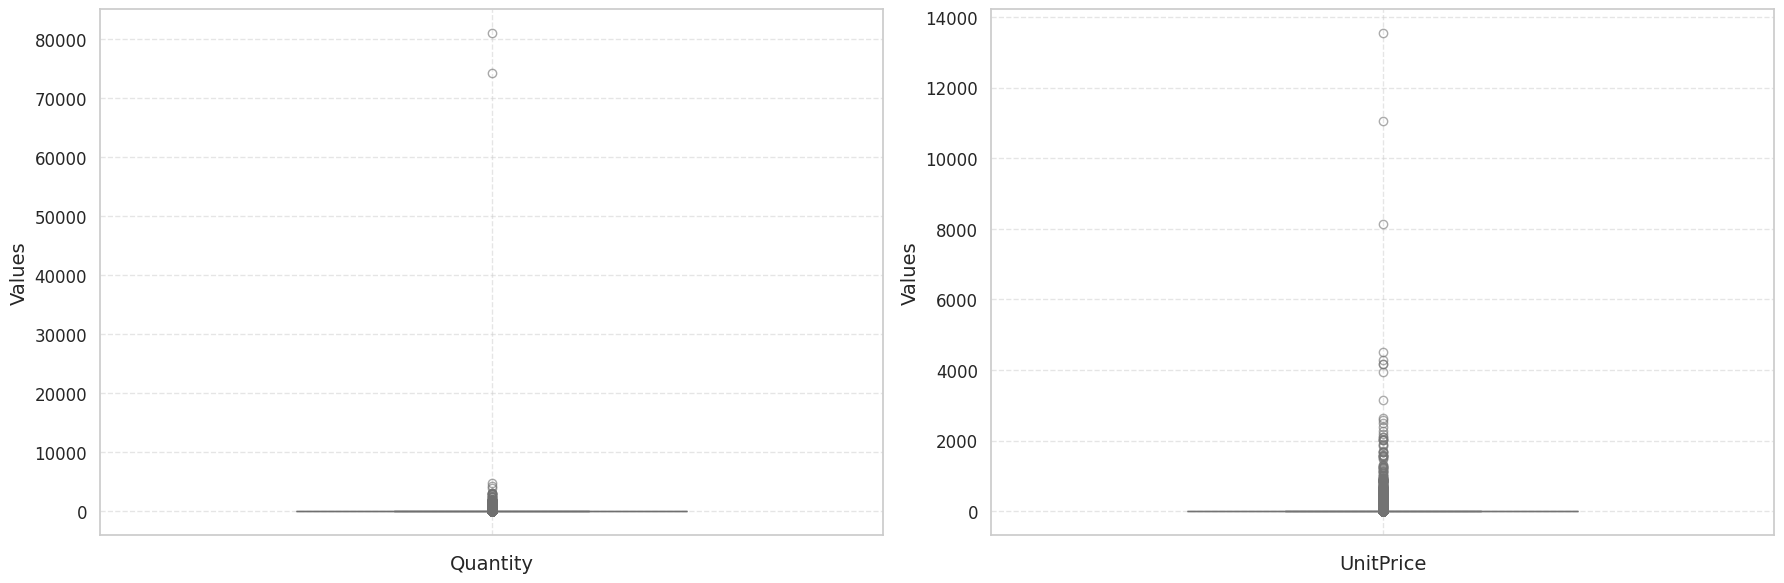

In [ ]:
# Make Box_Plot list to store both of the Boxplots before and after handling it
Box_Plot_list = []
# Set Seaborn style
sns.set(style="whitegrid")

# Create a figure with 1 row and 2 columns for subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Boxplot for Quantity
sns.boxplot(ax=axes[0], y='Quantity', data=data,
            color='skyblue',
            width=0.5,
            flierprops=dict(marker='o', color='red', alpha=0.6)
)
axes[0].set_xlabel('Quantity', fontsize=14)
axes[0].set_ylabel('Values', fontsize=14)
axes[0].tick_params(axis='x', labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)
axes[0].grid(True, linestyle='--', alpha=0.5)

# Boxplot for UnitPrice
sns.boxplot(ax=axes[1], y='UnitPrice', data=data,
            color='lightgreen',
            width=0.5,
            flierprops=dict(marker='o', color='red', alpha=0.6)
)
axes[1].set_xlabel('UnitPrice', fontsize=14)
axes[1].set_ylabel('Values', fontsize=14)
axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)
axes[1].grid(True, linestyle='--', alpha=0.5)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save as png
plt.savefig('BoxPlot_before_Dropping_outliers.png',bbox_inches='tight')
# Add it to the list
Box_Plot_list.append(fig)
# Show the combined plot
plt.show()

In [ ]:
# Function to detect the outliers using IQR.
def detect_outliers_iqr(df: pd.DataFrame, column: str) -> pd.DataFrame:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [ ]:
quantity_outliers = detect_outliers_iqr(data, 'Quantity')
print('Number of outliers in Quantity column:', quantity_outliers.shape[0])
print(f'Percenetage of outliers in Quantity column: {(quantity_outliers.shape[0]/data.shape[0])*100:.2f} %')
# Deleting Quantity Outliers
data = data.drop(quantity_outliers.index)
print('_____________________________________________')
unitprice_outliers = detect_outliers_iqr(data, 'UnitPrice')
print('Number of outliers in Quantity column:', quantity_outliers.shape[0])
print(f'Percenetage of outliers in UnitPrice column: {(unitprice_outliers.shape[0]/data.shape[0])*100:.2f} %')
# Deleting UnitPrice Ouliers
data = data.drop(unitprice_outliers.index)

print("Succefully removed outliers")
#

Number of outliers in Quantity column: 56363
Percenetage of outliers in Quantity column: 10.63 %
_____________________________________________
Number of outliers in Quantity column: 56363
Percenetage of outliers in UnitPrice column: 6.56 %
Succefully removed outliers


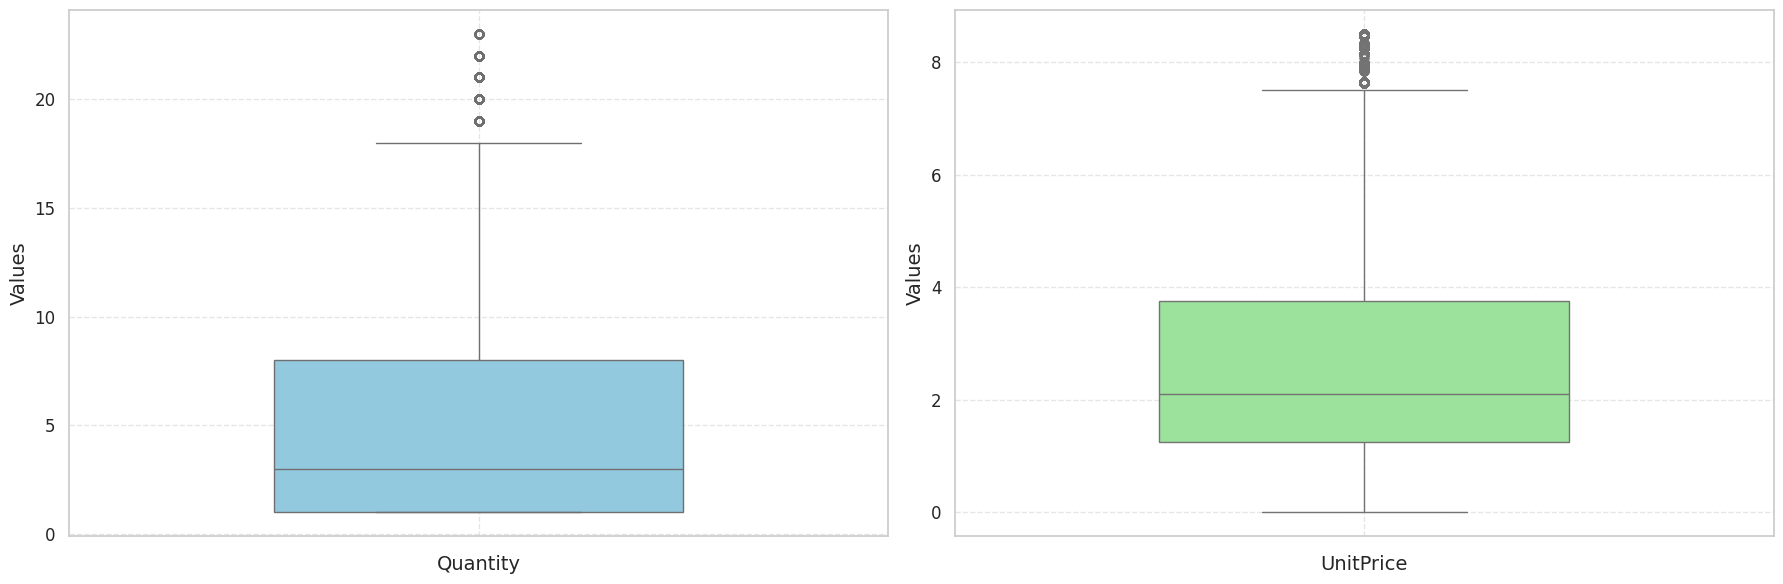

In [ ]:
# Check for outliers again
# Set Seaborn style
sns.set(style="whitegrid")

# Create a figure with 1 row and 2 columns for subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Boxplot for Quantity
sns.boxplot(ax=axes[0], y='Quantity', data=data,
            color='skyblue',
            width=0.5,
            flierprops=dict(marker='o', color='red', alpha=0.6)
)
axes[0].set_xlabel('Quantity', fontsize=14)
axes[0].set_ylabel('Values', fontsize=14)
axes[0].tick_params(axis='x', labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)
axes[0].grid(True, linestyle='--', alpha=0.5)

# Boxplot for UnitPrice
sns.boxplot(ax=axes[1], y='UnitPrice', data=data,
            color='lightgreen',
            width=0.5,
            flierprops=dict(marker='o', color='red', alpha=0.6)
)
axes[1].set_xlabel('UnitPrice', fontsize=14)
axes[1].set_ylabel('Values', fontsize=14)
axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)
axes[1].grid(True, linestyle='--', alpha=0.5)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save as png
plt.savefig('boxplotsafterdeletingoutliers.png',bbox_inches='tight')
# Add it to the list
Box_Plot_list.append(fig)
# Show the combined plot
plt.show()

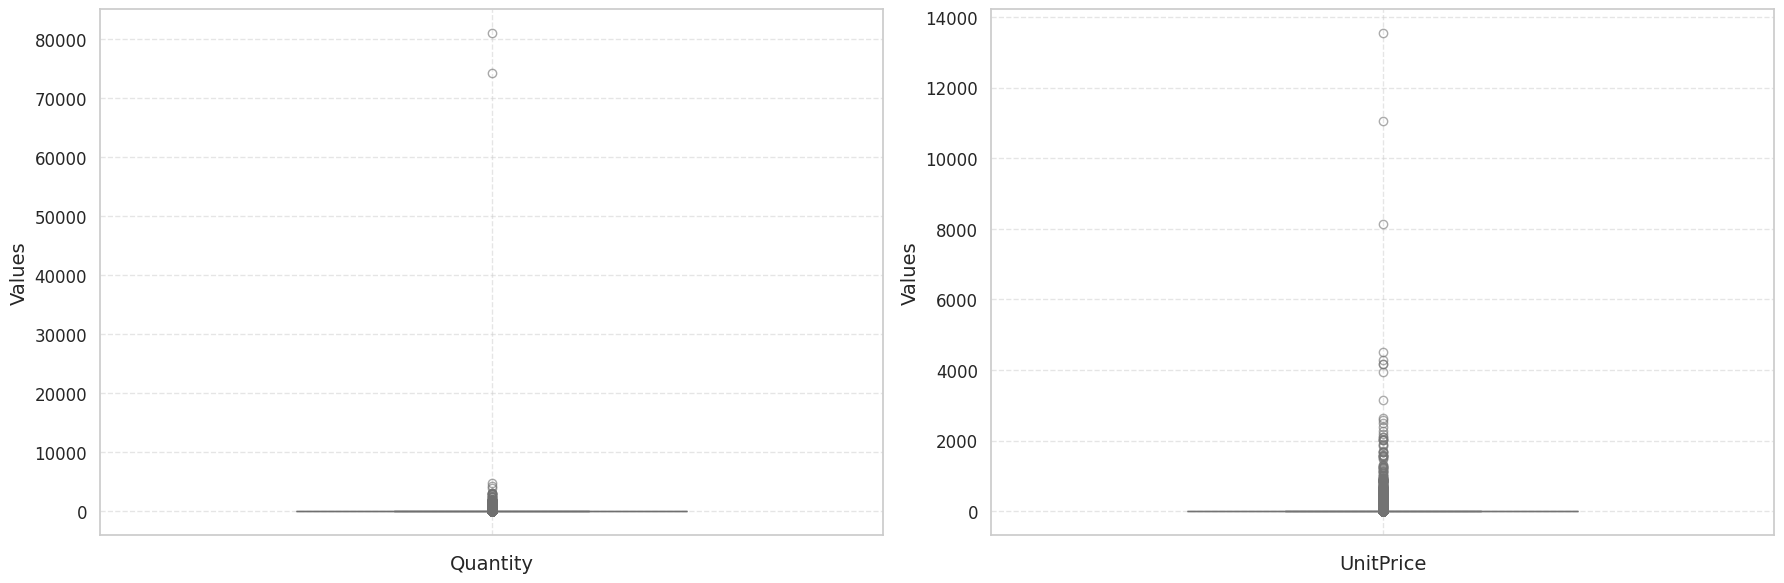

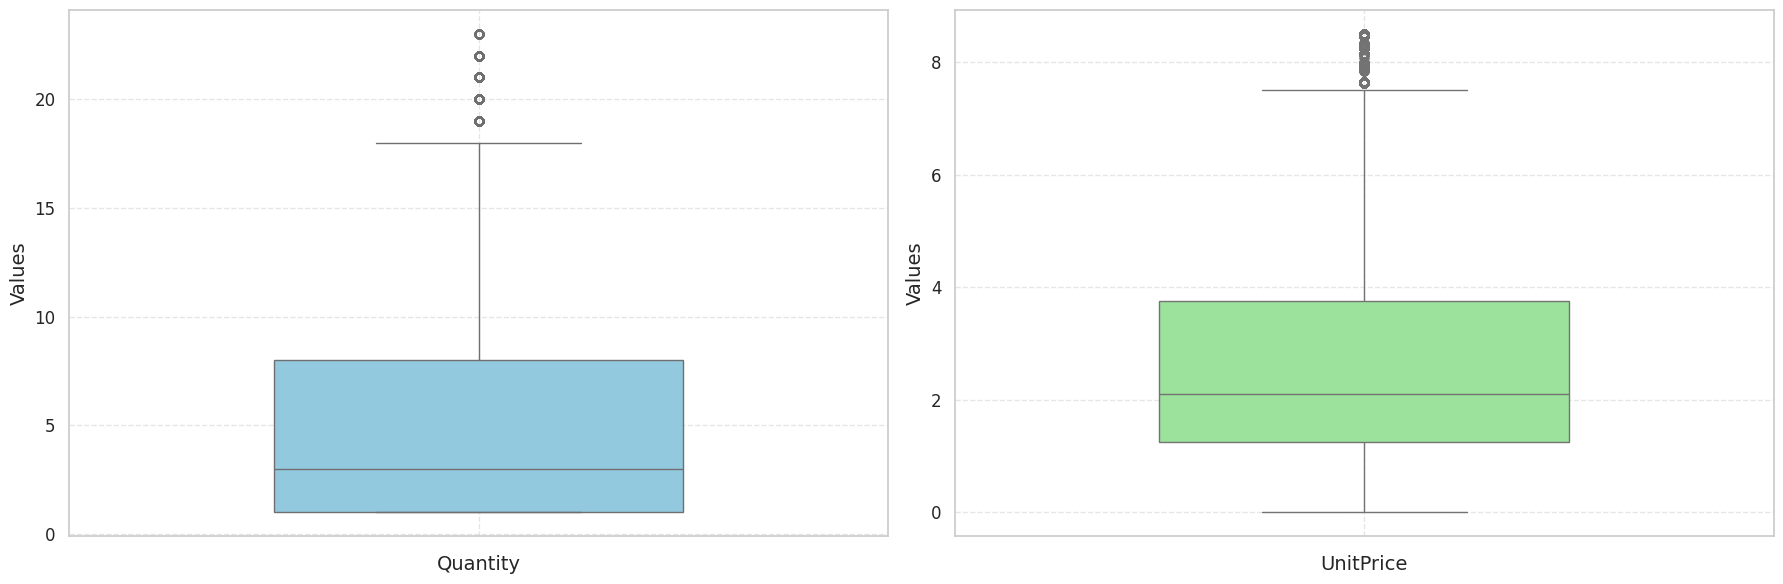

In [ ]:
# Print both of the figures
for fig in Box_Plot_list:
  display(fig)

Trying to remove outliers again

In [ ]:
quantity_outliers = detect_outliers_iqr(data, 'Quantity')
print('Number of outliers in Quantity column:', quantity_outliers.shape[0])
print(f'Percenetage of outliers in Quantity column: {(quantity_outliers.shape[0]/data.shape[0])*100:.2f} %')
# Deleting Quantity Outliers
data = data.drop(quantity_outliers.index)
print('_____________________________________________')
unitprice_outliers = detect_outliers_iqr(data, 'UnitPrice')
print('Number of outliers in Quantity column:', quantity_outliers.shape[0])
print(f'Percenetage of outliers in UnitPrice column: {(unitprice_outliers.shape[0]/data.shape[0])*100:.2f} %')
# Deleting UnitPrice Ouliers
data = data.drop(unitprice_outliers.index)

print("Succefully removed outliers")
#

Number of outliers in Quantity column: 5623
Percenetage of outliers in Quantity column: 1.27 %
_____________________________________________
Number of outliers in Quantity column: 5623
Percenetage of outliers in UnitPrice column: 3.48 %
Succefully removed outliers


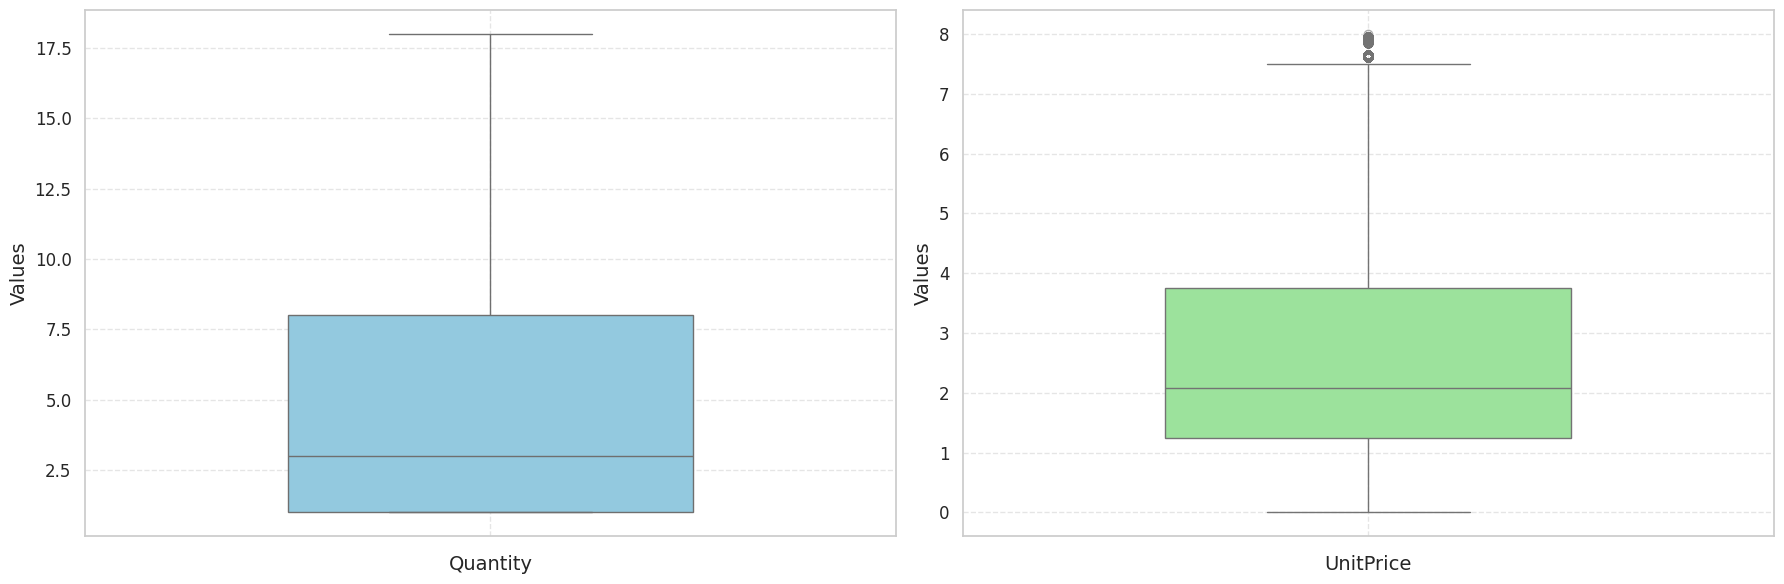

In [ ]:
# Check for outliers again
# Set Seaborn style
sns.set(style="whitegrid")

# Create a figure with 1 row and 2 columns for subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Boxplot for Quantity
sns.boxplot(ax=axes[0], y='Quantity', data=data,
            color='skyblue',
            width=0.5,
            flierprops=dict(marker='o', color='red', alpha=0.6)
)
axes[0].set_xlabel('Quantity', fontsize=14)
axes[0].set_ylabel('Values', fontsize=14)
axes[0].tick_params(axis='x', labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)
axes[0].grid(True, linestyle='--', alpha=0.5)

# Boxplot for UnitPrice
sns.boxplot(ax=axes[1], y='UnitPrice', data=data,
            color='lightgreen',
            width=0.5,
            flierprops=dict(marker='o', color='red', alpha=0.6)
)
axes[1].set_xlabel('UnitPrice', fontsize=14)
axes[1].set_ylabel('Values', fontsize=14)
axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)
axes[1].grid(True, linestyle='--', alpha=0.5)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save as png
plt.savefig('boxplotsafterdeletingoutliers_2.png',bbox_inches='tight')
# Add it to the list
Box_Plot_list.append(fig)
# Show the combined plot

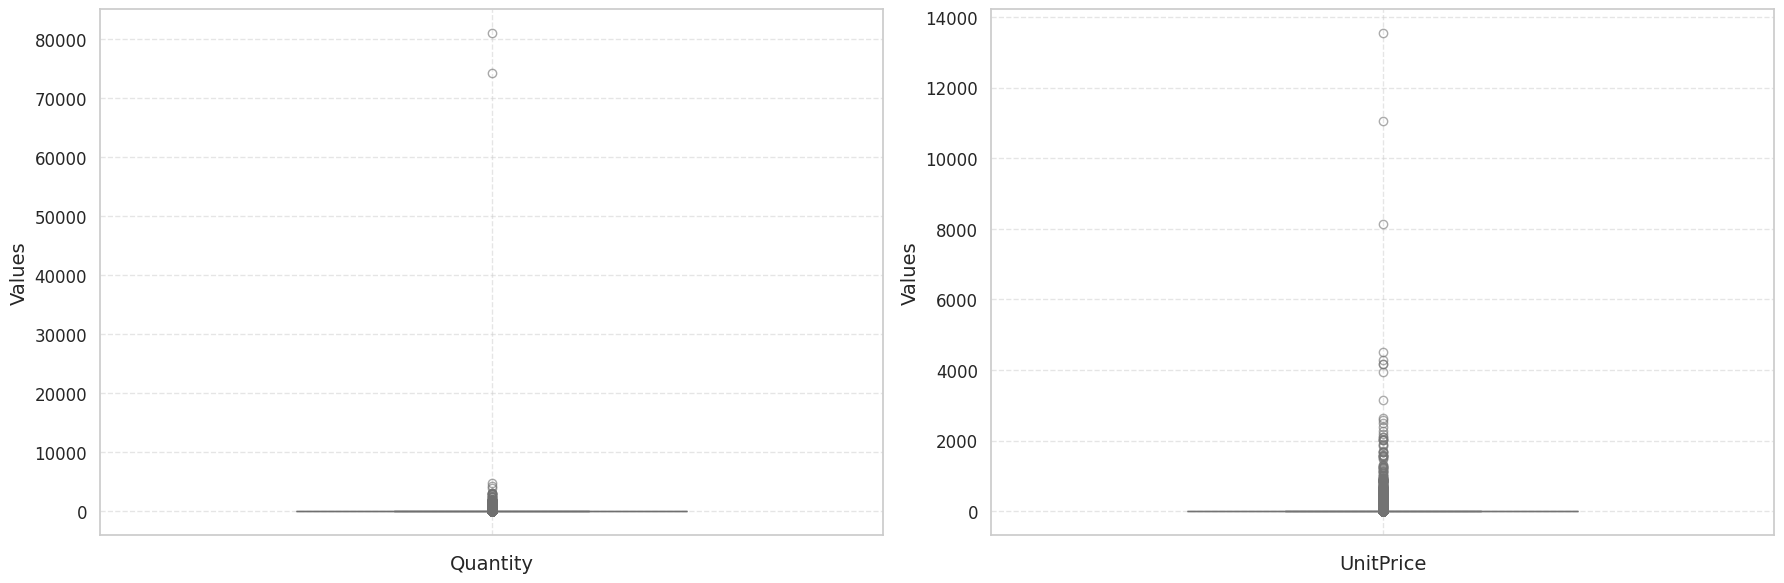

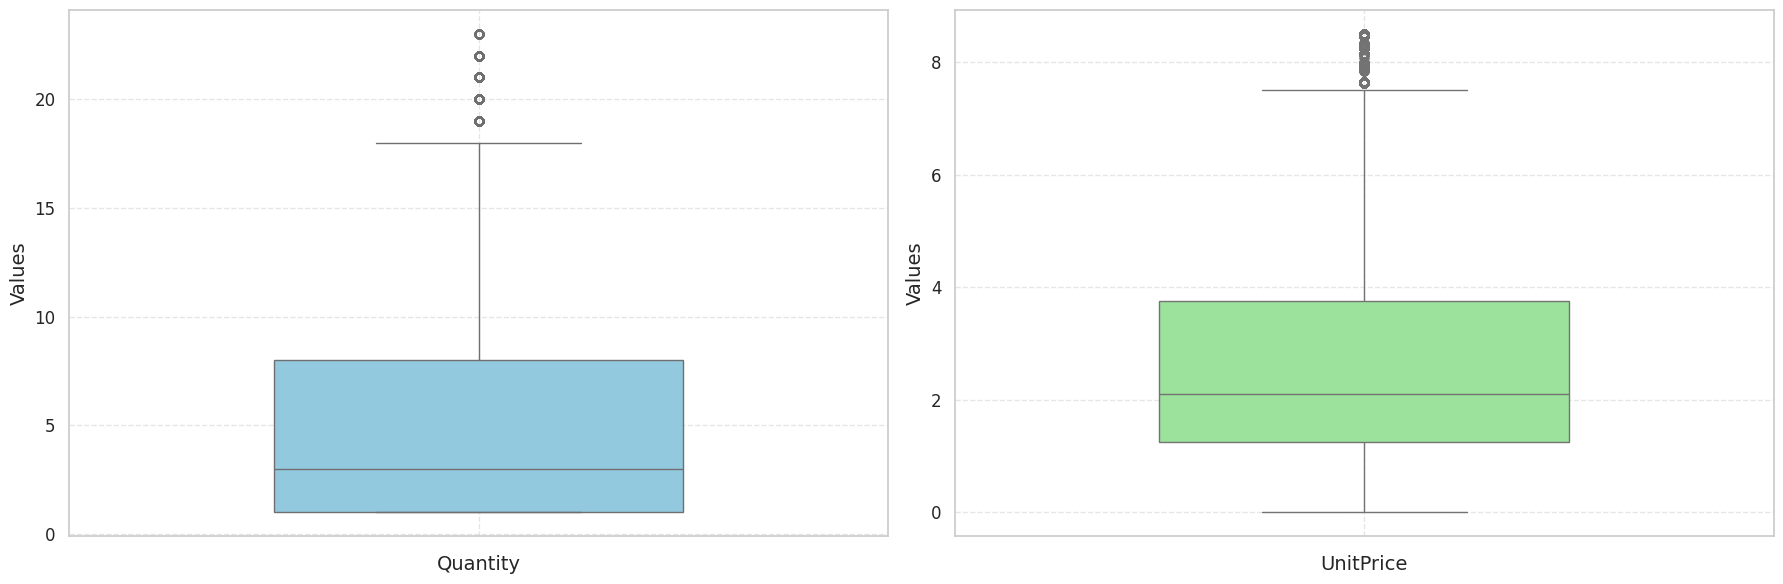

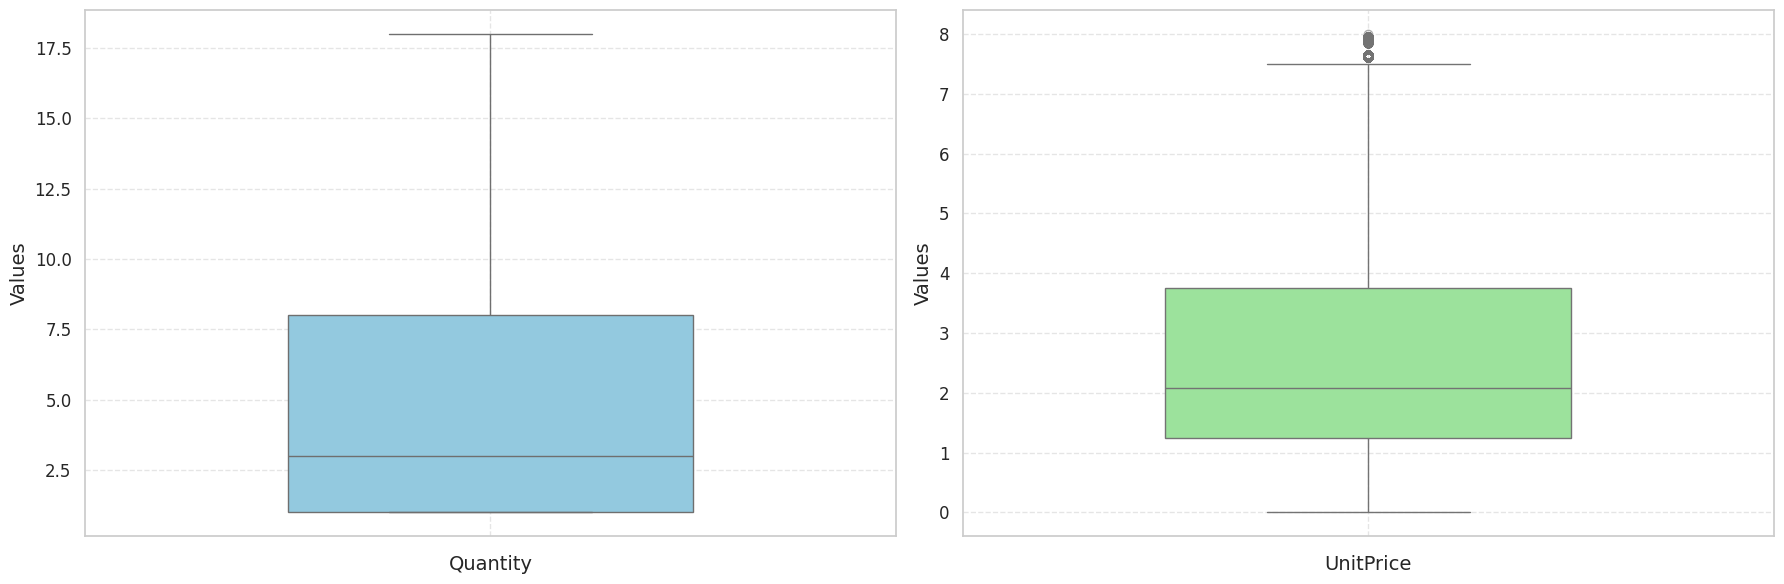

In [ ]:
# Print both of the figures
for fig in Box_Plot_list:
  display(fig)


---

<h1 style="font-size: 50px; font-family: Arial, sans-serif; color: #4CAF50;">
  Now The data is clear so we are ready to Go !!!!!!  🕺🕺🕺

</h1>




---





## > Create a TotalPrice column





> We can calculate Total price from Quantity and Unit price



In [ ]:
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

#data.loc[:, 'TotalPrice'] = data['Quantity'] * data['UnitPrice']  # ---> to avoid warning

In [ ]:
data

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30  
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom       22.00  
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
...                    ...        ...         ...             ...         ...  
541904 2011-12-09 12:50:00       0.85     12680.0          France       10.20  
541905 2011-12-09 12:50:00       2.10     12680.0          France       12.60  
541906 2011-12-09 12:50:00       4.15     12680.0          France       16.60  
541907 2011-12-09 12:50:00       4.15     12680.0          France       16.60  
541908 2011-12-09 12:50:00       4.95     12680.0          France       14.85  

[421817 rows x 9 columns]

# 🎯 **Task 2 : Exploratory Data Analysis (EDA)** 🔍
**Description**: Perform basic descriptive statistics and identify insights from the dataset. Analyze top-selling products and calculate total revenue and transactions.values. You will also check the data types of each column to understand how the data is structured.

**Requirments**:
-  Use .describe() for statistical summary.
- Identify top 10 selling products by Quantity.
- Calculate total revenue and number of transactions.





## > statistical summary ` .describe() `


In [ ]:
data.describe()

Quantity                    InvoiceDate      UnitPrice  \
count  421817.000000                         421817  421817.000000   
mean        4.795030  2011-07-05 02:55:50.266821888       2.596190   
min         1.000000            2010-12-01 08:26:00       0.001000   
25%         1.000000            2011-03-27 14:28:00       1.250000   
50%         3.000000            2011-07-20 13:10:00       2.080000   
75%         8.000000            2011-10-20 13:07:00       3.750000   
max        18.000000            2011-12-09 12:50:00       8.000000   
std         4.205323                            NaN       1.775325   

          CustomerID     TotalPrice  
count  421817.000000  421817.000000  
mean    11360.840891      10.317545  
min        -1.000000       0.001000  
25%        -1.000000       3.260000  
50%     14426.000000       6.640000  
75%     16340.000000      15.000000  
max     18287.000000     137.700000  
std      6897.718153      10.592221

In [ ]:
data.describe(include='object')

InvoiceNo StockCode                         Description         Country
count     421817    421817                              421817          421817
unique     17690      3582                                3690              38
top       573585    85123A  WHITE HANGING HEART T-LIGHT HOLDER  United Kingdom
freq         904      1867                                1923          392300



## > Identify top 10 selling products by Quantity.





> Using groupby --> Decription

make aggregate sum on quantity of each Decription have been sold with how much quantity




In [ ]:
#printing top 10 selling products
# data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
top_selling_by_description = data.groupby('Description')['Quantity'].sum().nlargest(10)

display(top_selling_by_description)

Description
ASSORTED COLOUR BIRD ORNAMENT         10970
WHITE HANGING HEART T-LIGHT HOLDER    10700
JUMBO BAG RED RETROSPOT               10180
LUNCH BAG RED RETROSPOT                8096
JAM MAKING SET PRINTED                 7597
HEART OF WICKER SMALL                  6725
VICTORIAN GLASS HANGING T-LIGHT        6622
PARTY BUNTING                          6593
LUNCH BAG  BLACK SKULL.                6523
LUNCH BAG CARS BLUE                    6387
Name: Quantity, dtype: int64

> Use Groupby method  on stockcode,

 make aggregate sum on quantity of each stockcode have been sold with how much quantity


 **then**


I am going to display each description in stockcode and its total quantity that had been sold



> make aggregate sum on quantity of each stockcode have been sold with how much quantity


In [ ]:
#printing top 10 selling products using stockcode

top_selling_by_stockcode = data.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(10)

display(top_selling_by_stockcode)

StockCode
84879     10970
85123A    10549
85099B    10180
20725      8096
22961      7597
23203      6766
22469      6725
22197      6716
22178      6622
47566      6593
Name: Quantity, dtype: int64



>  display each description in stockcode and its total quantity that had been sold



In [ ]:
#Getting different discribtion for every top 10 stock code

for stockcode in top_selling_by_stockcode.index:
    descriptions = data[data['StockCode'] == stockcode]['Description'].unique()
    print(f"description for {stockcode} :")
    for description in descriptions:
        print(f"\t {description} ------> {data[data['Description'] == description]['Quantity'].sum()}")
    print()

description for 84879 :
	 ASSORTED COLOUR BIRD ORNAMENT ------> 10970

description for 85123A :
	 WHITE HANGING HEART T-LIGHT HOLDER ------> 10700
	 CREAM HANGING HEART T-LIGHT HOLDER ------> 29

description for 85099B :
	 JUMBO BAG RED RETROSPOT ------> 10180

description for 20725 :
	 LUNCH BAG RED RETROSPOT ------> 8096

description for 22961 :
	 JAM MAKING SET PRINTED ------> 7597

description for 23203 :
	 JUMBO BAG DOILEY PATTERNS ------> 3015
	 JUMBO BAG VINTAGE DOILEY  ------> 24
	 JUMBO BAG VINTAGE DOILY  ------> 3727

description for 22469 :
	 HEART OF WICKER SMALL ------> 6725

description for 22197 :
	 SMALL POPCORN HOLDER ------> 2936
	 POPCORN HOLDER ------> 3780

description for 22178 :
	 VICTORIAN GLASS HANGING T-LIGHT ------> 6622

description for 47566 :
	 PARTY BUNTING ------> 6593



In [ ]:
# This will help us decide which description to use for category extraction  ---> most repeated(most frequent ) by mode()
most_freq_description = data.groupby('StockCode')['Description'].apply(lambda x: x.mode()[0])

# Merge the most frequent description with the sales data
top_selling_by_stockcode = pd.merge(top_selling_by_stockcode, most_freq_description, on='StockCode')

In [ ]:
top_selling_by_stockcode

Quantity                         Description
StockCode                                              
84879         10970       ASSORTED COLOUR BIRD ORNAMENT
85123A        10549  WHITE HANGING HEART T-LIGHT HOLDER
85099B        10180             JUMBO BAG RED RETROSPOT
20725          8096             LUNCH BAG RED RETROSPOT
22961          7597              JAM MAKING SET PRINTED
23203          6766            JUMBO BAG VINTAGE DOILY 
22469          6725               HEART OF WICKER SMALL
22197          6716                      POPCORN HOLDER
22178          6622     VICTORIAN GLASS HANGING T-LIGHT
47566          6593                       PARTY BUNTING



> Count plot for top 10 selling products by quantity (using stockcode for grouping)



<ipython-input-516-359a0df510d5>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




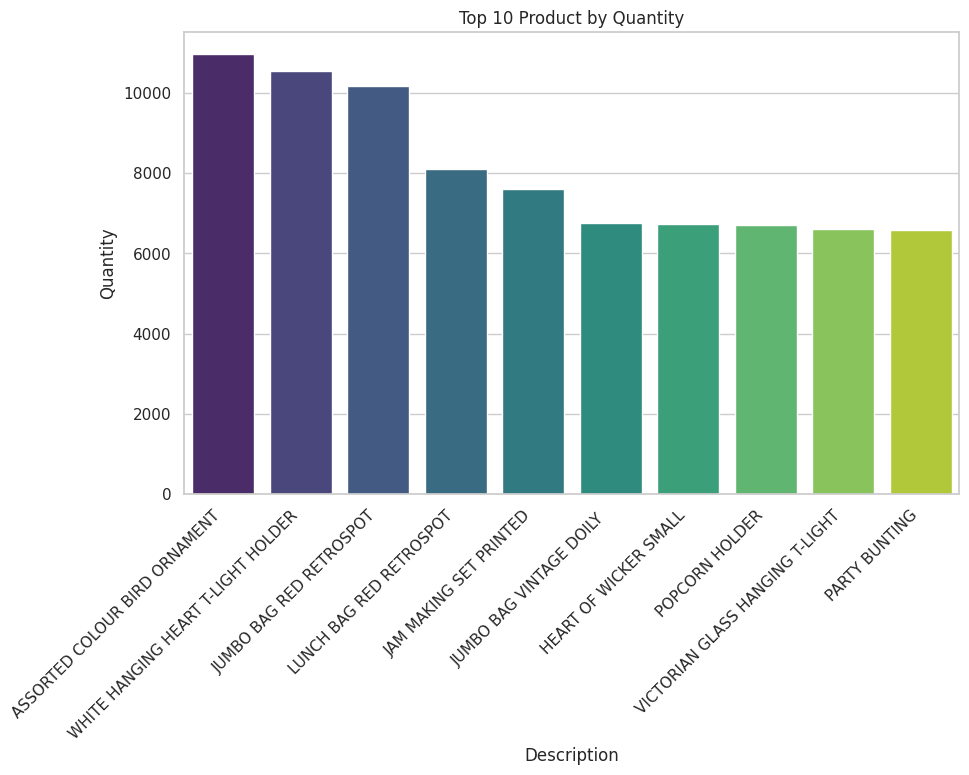

In [ ]:

# Create a bar plot for the top 10 categories by total revenue
plt.figure(figsize=(10, 6))
sns.barplot(x='Description', y='Quantity', data=top_selling_by_stockcode, palette='viridis')


plt.xlabel('Description')
plt.ylabel('Quantity')
plt.title('Top 10 Product by Quantity')
plt.xticks(rotation=45, ha='right')
#Save the figure in big photo
plt.savefig('Top_10_products_by_Quantity.png',format="png",dpi=800,bbox_inches='tight')
plt.show()
#plt.savefig('Top_10_products_by_Quantity.png',format="png",dpi=800)
plt.show()


<h1 style="font-size: 50px; font-family: Arial, sans-serif; color: #4CAF50;">
  We found this observation 🔍

</h1>

* From grouping by Description and stockcode we got the same top 10 products
* But there is difference in number due to some of stockcode has more than one description
* for a more precise  numbers we can use ----> stock codes



---






## > Calculate total revenue
 sum of TotalPrice of each  Invoice in our record

In [ ]:
#calc and print the total revenue
total_revenue = data['TotalPrice'].sum()


print("Total revenue :",total_revenue)

Total revenue : 4352115.683999999



## > Calculate number of transactions
 sum of nunique InvoiceNo in our record

In [ ]:
# print totall of transactions

num_transactions = data['InvoiceNo'].nunique()

print("Total transactions :",num_transactions)

Total transactions : 17690


In [ ]:
#number of unique customers
unique_customers = data['CustomerID'].nunique()
print("Number of unique Customers :",unique_customers)

Number of unique Customers : 4150


# 🎯 **Task 3 : Time Series Analysis** 📅📈
**Description**: Analyze sales trends over time and visualize monthly sales. Identify months with highest and lowest sales.

**Requirments**:
-  Resample the data to obtain monthly sales
-  Plot monthly sales trends using a line plot.
-  Identify the month with the highest and lowest sales.


In [ ]:
#Resample the data to obtain monthly sales
monthly_sales = data.resample('M', on='InvoiceDate')['TotalPrice'].sum()

monthly_sales

<ipython-input-520-99d724827a59>:2: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



InvoiceDate
2010-12-31    331374.890
2011-01-31    267087.710
2011-02-28    230090.820
2011-03-31    296104.120
2011-04-30    239862.071
2011-05-31    325108.650
2011-06-30    293702.120
2011-07-31    299428.581
2011-08-31    299098.880
2011-09-30    436322.032
2011-10-31    495822.820
2011-11-30    643521.880
2011-12-31    194591.110
Freq: ME, Name: TotalPrice, dtype: float64

In [ ]:
#print columns names
monthly_sales.values

array([331374.89 , 267087.71 , 230090.82 , 296104.12 , 239862.071,
       325108.65 , 293702.12 , 299428.581, 299098.88 , 436322.032,
       495822.82 , 643521.88 , 194591.11 ])

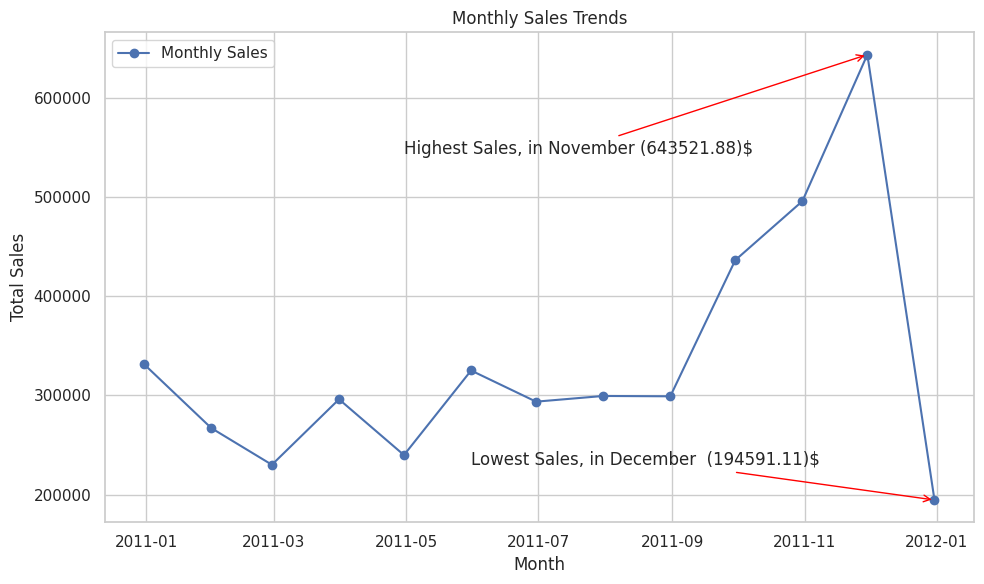

In [ ]:
# Plot monthly sales trends using a line plot.
plt.figure(figsize=(10, 6))


plt.plot(monthly_sales.index, monthly_sales.values, marker='o', color='b', linestyle='-', label='Monthly Sales')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.legend()


#annotation highest value :
plt.annotate(f'Highest Sales, in November ({monthly_sales.values[11]:.02f})$',
             xy=(monthly_sales.index[11],monthly_sales.values[11]),
            xytext=(monthly_sales.index[4],monthly_sales.values[11]-100000) ,
             arrowprops=dict(facecolor='red',edgecolor='red',arrowstyle='->') )

#annotation lowest value :
plt.annotate(f'Lowest Sales, in December  ({monthly_sales.values[-1]:.02f})$',
             xy=(monthly_sales.index[-1],monthly_sales.values[-1]),
            xytext=(monthly_sales.index[-8],monthly_sales.values[2]) ,
             arrowprops=dict(facecolor='red',edgecolor='red',arrowstyle='->') )


plt.tight_layout()

plt.savefig('Monthly_Sales_Trends.png',format="png",dpi=800,bbox_inches='tight')
plt.show()

In [ ]:
#Identify the month with the highest and lowest sales
highest_sales_month = monthly_sales.idxmax()
lowest_sales_month = monthly_sales.idxmin()
print("Month with the highest sales:", highest_sales_month.strftime("%Y-%m"))
print("Month with the lowest sales:", lowest_sales_month.strftime("%Y-%m"))

Month with the highest sales: 2011-11
Month with the lowest sales: 2011-12


# 🎯 **Task 4 : RFM Analysis (Customer Segmentation)** 🧩
**Description**: Segment customers based on recency, frequency, and monetary value. Visualize customer distribution in segments.

**Requirments**:
-  Calculate recency (days since last purchase).
-  Calculate frequency (number of purchases).
-  Calculate monetary value (total spend).
-  Segment customers into High, Medium, Low-value groups.





---
first :

Remove rows with Customer ID = -1 ---> (Unknown Customers)

Including rows with unknown or invalid Customer IDs can distort your analysis and lead to misleading segmentation results


---



In [ ]:
# Remove rows where Customer ID is -1
data_cleaned = data[data['CustomerID'] != -1]

# Verify if the rows with Customer ID = -1 have been removed
print(f"Rows after removal: {data_cleaned.shape[0]}")

Rows after removal: 312006




## >  Calculate recency (days since last purchase)





> We need reference date

to lets make it one day after the last purchase using `data['InvoiceDate'].max() + pd.Timedelta(days=1)`



In [ ]:
#get and print the current date
current_date = data_cleaned['InvoiceDate'].max() + pd.Timedelta(days=1)
current_date

Timestamp('2011-12-10 12:50:00')



> make aggregate  on InvoiceDate for each Invoice in our record


In [ ]:
#Calculate recency

#group by CustomerID then agg for each InvoiceDate by subtract i the current data (our reference)
recency = data_cleaned.groupby('CustomerID').agg({'InvoiceDate': lambda x: (current_date - x.max()).days})

#Rename column name to better visualization
recency = recency.rename(columns={'InvoiceDate':'Recency_in_days'}, inplace=False)
#display(recency)



## > Calculate frequency (number of purchases)



In [ ]:
#calculate frequncy for each customer

frequency = data_cleaned.groupby('CustomerID').agg({'InvoiceNo': 'nunique'})       # pd.Series.nunique is equivalent to 'nunique'
frequency = frequency.rename(columns={'InvoiceNo':'Frequency'}, inplace=False)
#display(frequency)



## > Calculate monetary value (total spend)



In [ ]:
# Calculate total spend by each cutomer
monetary = data_cleaned.groupby('CustomerID').agg({'TotalPrice': 'sum'})
monetary = monetary.rename(columns={'TotalPrice':'Monetary'}, inplace=False)
#display(monetary)

 Combine them into one DataFrame

In [ ]:
RFM_df = pd.concat([recency, frequency, monetary], axis=1)

RFM_df

Recency_in_days  Frequency  Monetary
CustomerID                                      
12347.0                   2          7   2735.37
12349.0                  19          1    957.75
12350.0                 310          1    274.00
12352.0                  36          7   1130.94
12353.0                 204          1     29.30
...                     ...        ...       ...
18280.0                 278          1    160.70
18281.0                 181          1     46.92
18282.0                   8          2    113.13
18283.0                   4         16   2051.98
18287.0                  59          2    529.88

[4149 rows x 3 columns]



## > Segment customers into High, Medium, Low-value groups





> Scoring based on Recency, Frequency and Monetary to calculate RFM score



In [ ]:
# Scoring Recency (reverse logic: lower days = higher score)
RFM_df['R_Score'] = pd.qcut(RFM_df['Recency_in_days'], 5, labels=[5, 4, 3, 2, 1])

In [ ]:
# Scoring Frequency (higher frequency = higher score)  {we need duplicates='drop' cause of low variation}
RFM_df['F_Score'] = pd.qcut(RFM_df['Frequency'], 5, labels=[1, 2, 3, 4], duplicates='drop')

In [ ]:
#checking for
RFM_df['F_Score'].nunique()

4

In [ ]:
# Scoring Monetary (higher spending = higher score)
RFM_df['M_Score'] = pd.qcut(RFM_df['Monetary'], 5, labels=[1, 2, 3, 4, 5])

In [ ]:
# Convert the scores to numeric values
RFM_df['R_Score'] = RFM_df['R_Score'].astype(int)
RFM_df['F_Score'] = RFM_df['F_Score'].astype(int)
RFM_df['M_Score'] = RFM_df['M_Score'].astype(int)

# Calculate the average RFM score for each customer
RFM_df['RFM_Score'] = RFM_df[['R_Score', 'F_Score', 'M_Score']].sum(axis=1)   #Sum over rows (axis =1)

In [ ]:
RFM_df

Recency_in_days  Frequency  Monetary  R_Score  F_Score  M_Score  \
CustomerID                                                                    
12347.0                   2          7   2735.37        5        4        5   
12349.0                  19          1    957.75        4        1        4   
12350.0                 310          1    274.00        1        1        2   
12352.0                  36          7   1130.94        3        4        4   
12353.0                 204          1     29.30        1        1        1   
...                     ...        ...       ...      ...      ...      ...   
18280.0                 278          1    160.70        1        1        2   
18281.0                 181          1     46.92        2        1        1   
18282.0                   8          2    113.13        5        1        1   
18283.0                   4         16   2051.98        5        4        5   
18287.0                  59          2    529.88        3        1        3   

            RFM_Score  
CustomerID             
12347.0            14  
12349.0             9  
12350.0             4  
12352.0            11  
12353.0             3  
...               ...  
18280.0             4  
18281.0             4  
18282.0             7  
18283.0            14  
18287.0             7  

[4149 rows x 7 columns]



> Segment the customers based on the RFM Score


In [ ]:
# Calculate the quantiles for RFM_Score  (assume we divide the range 1/3)
low_threshold = RFM_df['RFM_Score'].quantile(0.33)
high_threshold = RFM_df['RFM_Score'].quantile(0.66)

# Set custom bin thresholds based on percentiles
bins = [0, low_threshold, high_threshold, 14]         # Max score is 14
labels = ['Low', 'Medium', 'High']

# Apply the segmentation
RFM_df['Segment'] = pd.cut(RFM_df['RFM_Score'], bins=bins, labels=labels, include_lowest=True)


In [ ]:
RFM_df

Recency_in_days  Frequency  Monetary  R_Score  F_Score  M_Score  \
CustomerID                                                                    
12347.0                   2          7   2735.37        5        4        5   
12349.0                  19          1    957.75        4        1        4   
12350.0                 310          1    274.00        1        1        2   
12352.0                  36          7   1130.94        3        4        4   
12353.0                 204          1     29.30        1        1        1   
...                     ...        ...       ...      ...      ...      ...   
18280.0                 278          1    160.70        1        1        2   
18281.0                 181          1     46.92        2        1        1   
18282.0                   8          2    113.13        5        1        1   
18283.0                   4         16   2051.98        5        4        5   
18287.0                  59          2    529.88        3        1        3   

            RFM_Score Segment  
CustomerID                     
12347.0            14    High  
12349.0             9  Medium  
12350.0             4     Low  
12352.0            11    High  
12353.0             3     Low  
...               ...     ...  
18280.0             4     Low  
18281.0             4     Low  
18282.0             7  Medium  
18283.0            14    High  
18287.0             7  Medium  

[4149 rows x 8 columns]

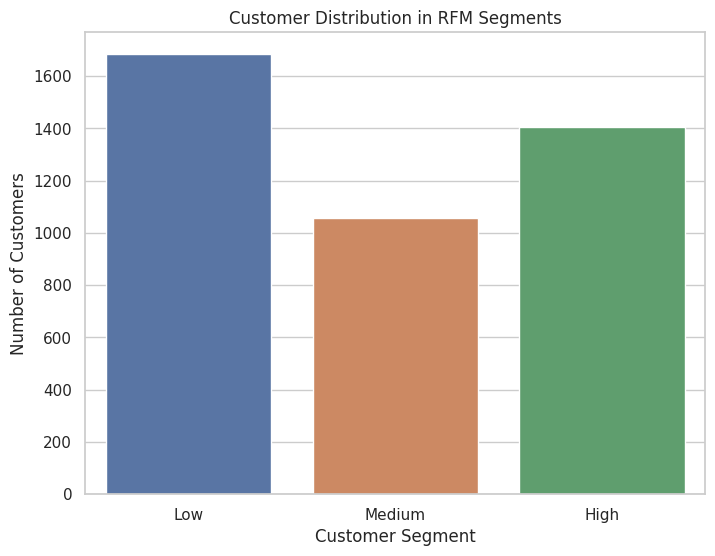

In [ ]:
# Create the countplot
plt.figure(figsize=(8,6))
sns.countplot(x='Segment', data=RFM_df, hue='Segment')

# Add titles and labels
plt.title('Customer Distribution in RFM Segments')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')

plt.savefig('Customer_Distribution_RFM_Segments.png',format="png",dpi=800,bbox_inches='tight')

plt.show()

In [ ]:
RFM_df

Recency_in_days  Frequency  Monetary  R_Score  F_Score  M_Score  \
CustomerID                                                                    
12347.0                   2          7   2735.37        5        4        5   
12349.0                  19          1    957.75        4        1        4   
12350.0                 310          1    274.00        1        1        2   
12352.0                  36          7   1130.94        3        4        4   
12353.0                 204          1     29.30        1        1        1   
...                     ...        ...       ...      ...      ...      ...   
18280.0                 278          1    160.70        1        1        2   
18281.0                 181          1     46.92        2        1        1   
18282.0                   8          2    113.13        5        1        1   
18283.0                   4         16   2051.98        5        4        5   
18287.0                  59          2    529.88        3        1        3   

            RFM_Score Segment  
CustomerID                     
12347.0            14    High  
12349.0             9  Medium  
12350.0             4     Low  
12352.0            11    High  
12353.0             3     Low  
...               ...     ...  
18280.0             4     Low  
18281.0             4     Low  
18282.0             7  Medium  
18283.0            14    High  
18287.0             7  Medium  

[4149 rows x 8 columns]

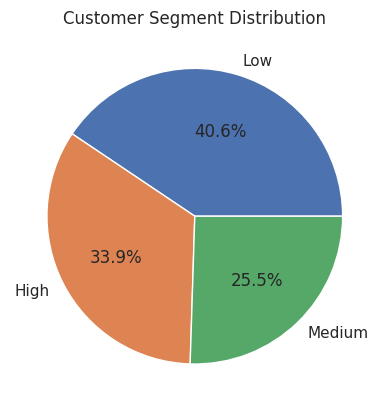

In [ ]:
#pie plot
RFM_df['Segment'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Customer Segment Distribution',ylabel='')
plt.savefig('Customer_Segment_Distribution.png',format="png",dpi=800,bbox_inches='tight')
plt.show()

In [ ]:
# Count the number of customers in each segment
segment_counts = RFM_df['Segment'].value_counts()

# Calculate the percentage of each segment
segment_percentage = (segment_counts / segment_counts.sum()) * 100

# Print the result
print(segment_percentage)

Segment
Low       40.588094
High      33.911786
Medium    25.500121
Name: count, dtype: float64


# 🎯 **Task 5 : Product Category Analysis** 📦💰
**Description**: Analyze sales and revenue by product category and visualize the top categories by revenue.

**Requirments**:
-  Extract product category from Description.
-  Calculate sales and revenue by category.
-  Create a bar plot of the top 5 categories by revenue.



In [ ]:
data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom       22.00  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34



> Funciton to extract category from description !



In [ ]:
# Extract product categories from the most frequent description
def extract_category_description(description):
    description = description.strip()  # Strip leading/trailing whitespaces
    words = description.split()  # Split description into words
    if len(words) < 3:
        return description  # Return entire description if there are less than 3 words
    else:
        # Extract first 2 words and last word
        first_two = ' '.join(words[:2])
        last_word = words[-1]
        result = f"{first_two} {last_word}"
        return result



> Using Description to extract catogories



In [ ]:
# Calculate sales and revenue by Description
category_stats = data.groupby(['Description']).agg(
    TotalSales=('Quantity', 'sum'),
    TotalRevenue=('TotalPrice', 'sum')
).reset_index()


In [ ]:
category_stats['Description'] = category_stats['Description'].apply(extract_category_description)

In [ ]:
# Get the top 5 categories by revenue
top5_categ_Desc = category_stats.sort_values(by='TotalRevenue', ascending=False).head(5)
top5_categ_Desc

Description  TotalSales  TotalRevenue
3540      WHITE HANGING HOLDER       10700      33389.40
2215             PARTY BUNTING        6593      32547.02
1673       JUMBO BAG RETROSPOT       10180      24148.66
3201            SPOTTY BUNTING        4466      22094.70
2019  NATURAL SLATE CHALKBOARD        6220      20266.76

In [ ]:
#Contribution of top 5 categories to over all revenue
top_5_contribution = top5_categ_Desc['TotalRevenue'].sum() / category_stats['TotalRevenue'].sum() * 100
print(f"Contribution of top 5 categories to over all revenue : {top_5_contribution:.2f}%")

Contribution of top 5 categories to over all revenue : 3.04%


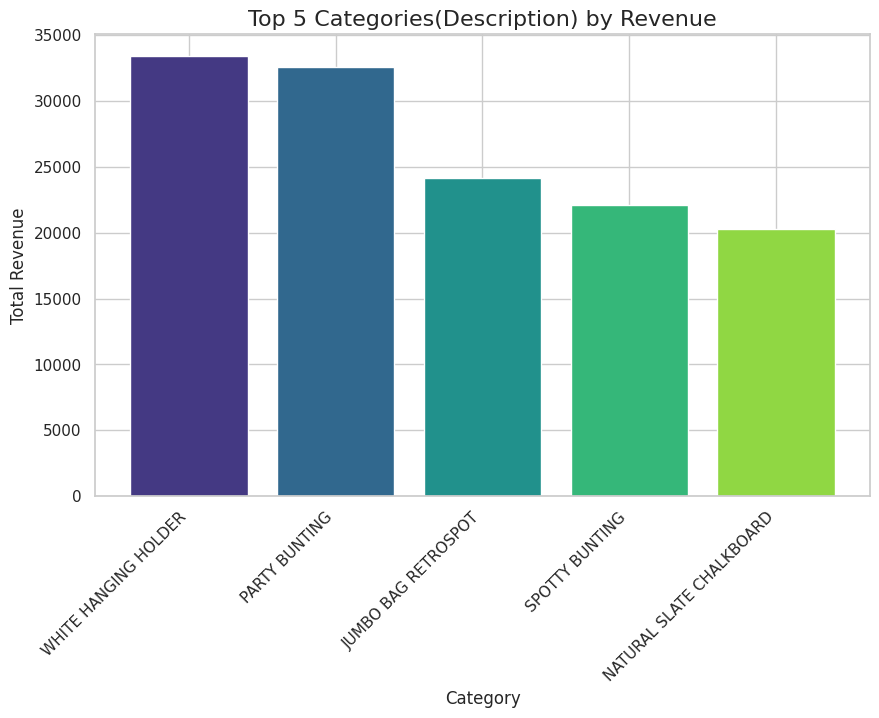

In [ ]:
# Visualize the top 5 categories by revenue
plt.figure(figsize=(10, 6))
color_list = sns.color_palette("viridis", 5)
plt.bar(top5_categ_Desc['Description'], top5_categ_Desc['TotalRevenue'], color=color_list)
plt.title('Top 5 Categories(Description) by Revenue', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.savefig('Top_5_Categories(Description)_by_Revenue.png',format="png",dpi=800,bbox_inches='tight')
plt.show()



> Using StockCode to extract catogories


In [ ]:
# Calculate sales and revenue by StockCode
category_stats = data.groupby(['StockCode']).agg(
    TotalSales=('Quantity', 'sum'),
    TotalRevenue=('TotalPrice', 'sum')
).reset_index()


In [ ]:
most_frequent_description = data.groupby('StockCode')['Description'].apply(lambda x: x.mode()[0])
stockcode_sales_revenue = pd.merge(category_stats, most_frequent_description, on='StockCode').sort_values(by='TotalRevenue', ascending=False).head(5)

In [ ]:
stockcode_sales_revenue['Description'] = stockcode_sales_revenue['Description'].apply(extract_category_description)

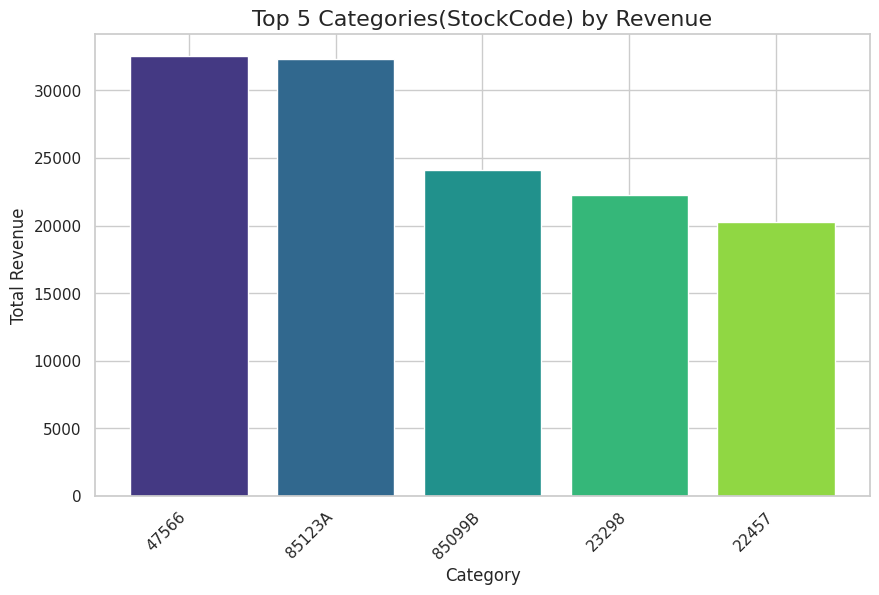

In [ ]:
# Visualize the top 5 categories by revenue
plt.figure(figsize=(10, 6))

color_list = sns.color_palette("viridis", 5)

plt.bar(stockcode_sales_revenue['StockCode'], stockcode_sales_revenue['TotalRevenue'], color=color_list)
plt.title('Top 5 Categories(StockCode) by Revenue', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

# 🎯 **Task 6 : Geographical Analysis** 🌍📊
**Description**: Analyze sales distribution by country and identify top revenue-generating countries.

**Requirments**:
-  Calculate total revenue by country.
-  Create a bar plot of the top 10 countries by revenue.
-  Calculate the percentage of sales from the top 3 countries.



In [ ]:
# Calculate total revenue by country
country_revenue = data.groupby('Country')['TotalPrice'].sum()

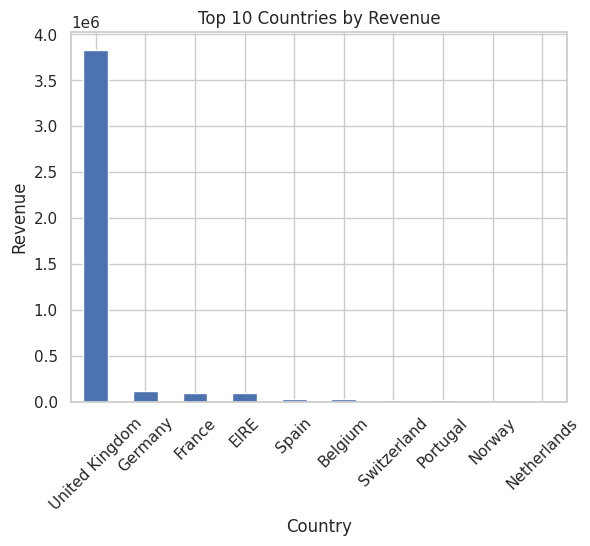

In [ ]:
# Create a bar plot of the top 10 countries by revenue
country_revenue.nlargest(10).plot(kind='bar', title='Top 10 Countries by Revenue')
plt.xlabel('Country')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.savefig('Top_10_Countries_by_Revenue.png',format="png",dpi=800,bbox_inches='tight')
plt.show()

In [ ]:
# Calculate the percentage of sales from the top 3 countries
top_3_countries = country_revenue.nlargest(3).sum() / country_revenue.sum() * 100
print(f"Percentage of Sales from Top 3 Countries: {top_3_countries:.2f}%")

Percentage of Sales from Top 3 Countries: 92.95%


# 🎯 **Task 7 : Customer Behavior Analysis** 👤🛒
**Description**: Analyze customer behavior based on order quantity, sales, and purchasing patterns.

**Requirments**:
-  Plot the distribution of order quantities.
-  Create a scatter plot of Quantity vs. TotalPrice.
-  Calculate and plot average daily sales throughout the week.



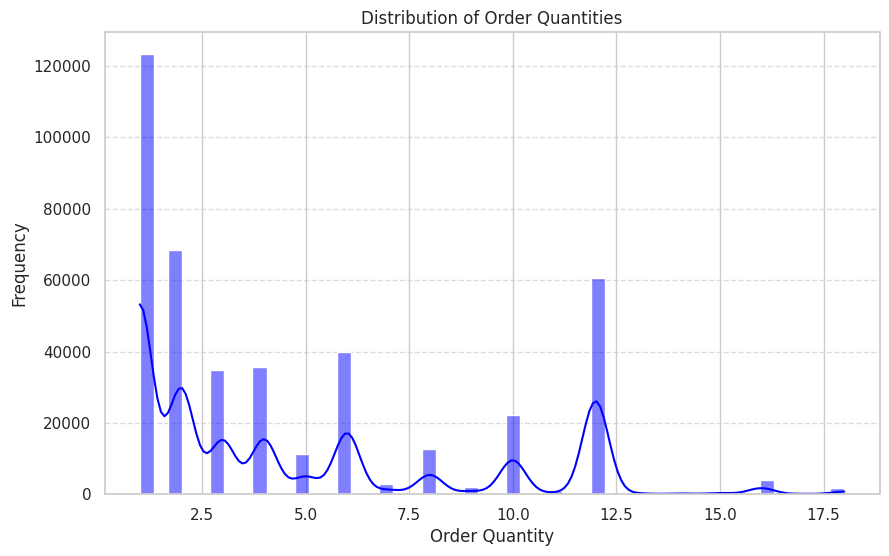

In [ ]:
# Plot the distribution of order quantities.
plt.figure(figsize=(10, 6))
sns.histplot(data['Quantity'], bins=50, kde=True, color='blue')
plt.title('Distribution of Order Quantities')
plt.xlabel('Order Quantity')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<h1 style="font-size: 50px; font-family: Arial, sans-serif; color: #4CAF50;">
  Distribution Characteristics(insights):

</h1>
-The plot now shows a heavy skew toward smaller order sizes, with most quantities clustering at the lower end of the positive range.
-A long tail indicates the presence of larger orders, though these are relatively infrequent compared to smaller ones.

 **Key Takeaways:**


 -The majority of customers place orders in small quantities.
 -The long tail suggests occasional bulk orders, which may represent specific customer segments

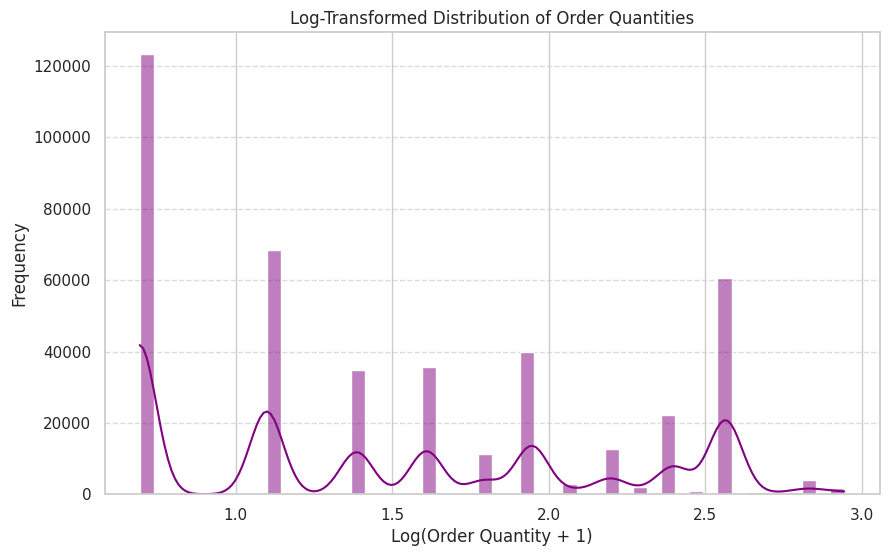

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(data['Quantity']), bins=50, kde=True, color='purple')
plt.title('Log-Transformed Distribution of Order Quantities')
plt.xlabel('Log(Order Quantity + 1)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('Log-Transformed_Distribution_of_Order_Quantities.png',format="png",dpi=800,bbox_inches='tight')
plt.show()


<h1 style="font-size: 50px; font-family: Arial, sans-serif; color: #4CAF50;">
   Distribution Characteristics:


</h1>


-The log transformation normalizes the data, revealing a clearer peak in the most common order sizes .
 -The distribution becomes easier to interpret, with gradual declines in frequency for larger orders.

**Key Takeaways:**

 -The log-transformed plot highlights patterns in typical customer behavior, focusing on smaller order quantities while reducing the visual impact of rare, larger orders.
 -The transformation allows for better modeling and segmentation of customer purchasing behavior.

<h1 style="font-size: 50px; font-family: Arial, sans-serif; color: #4CAF50;">
     Optimization


</h1>


Log transformation was applied to address the high skewness and extreme values in the raw quantity distribution.


**It helps by:**


 - Focusing on typical orders: Most orders are small, and the log transformation makes these trends more visible.


- Reducing outlier influence: Bulk orders are less visually dominant, which improves interpretability.

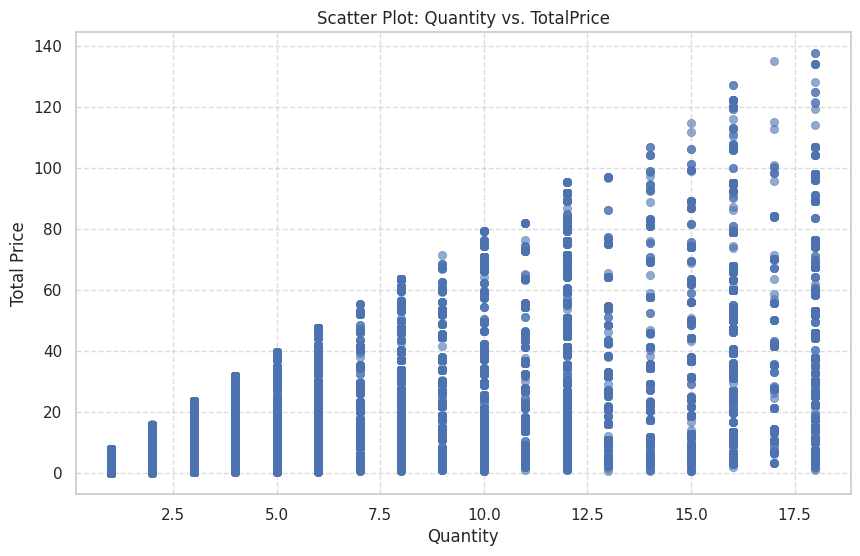

In [ ]:
# Create a scatter plot of Quantity vs. TotalPrice.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Quantity', y='TotalPrice', alpha=0.6, edgecolor=None)
plt.title('Scatter Plot: Quantity vs. TotalPrice')
plt.xlabel('Quantity')
plt.ylabel('Total Price')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.savefig('Scatter_Plot_Quantity_vs_TotalPrice.png',format="png",dpi=800,bbox_inches='tight')
plt.show()

In [ ]:
# Create an interactive scatter plot using Plotly
fig = px.scatter(
    data,
    x='Quantity',
    y='TotalPrice',
    title='Interactive Scatter Plot: Quantity vs. TotalPrice',
    labels={'Quantity': 'Order Quantity', 'TotalPrice': 'Total Price'},
    opacity=0.6
)

# Add range slider for the x-axis (Quantity)
fig.update_layout(
    xaxis=dict(
        title="Order Quantity",
        type="linear"
    ),
    yaxis=dict(
        title="Total Price"
    ),
    template="plotly_white"
)

fig.update_xaxes(rangeslider_visible=True)

# Show the plot
fig.show()


<h1 style="font-size: 50px; font-family: Arial, sans-serif; color: #4CAF50;">
   Insights


</h1>

**Concentration of Data**
- The majority of the data points are concentrated in the lower ranges of Order Quantity (near 0–10k) and Total Price (below 150k).
- This indicates that most orders have relatively low quantities and generate smaller total sales.

**Outliers:**
- A few data points stand out as extreme values, with significantly high order quantities (60k–80k) or total prices (over 150k).
- These could represent bulk orders or high-value transactions

**Pattern Observation:**
- There is no clear linear relationship between Order Quantity and Total Price. This means that larger quantities do not always result in proportionately higher revenues.

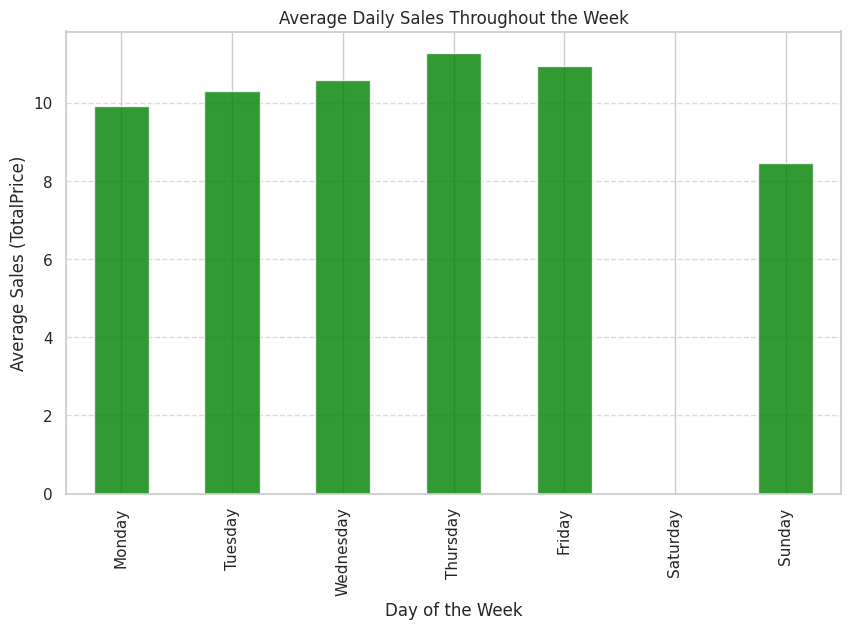

In [ ]:
# 3. Calculate and plot average daily sales throughout the week
# Extract the day of the week
data['DayOfWeek'] = data['InvoiceDate'].dt.day_name()

# Calculate average daily sales
daily_sales = data.groupby('DayOfWeek')['TotalPrice'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

plt.figure(figsize=(10, 6))
daily_sales.plot(kind='bar', color='green', alpha=0.8)
plt.title('Average Daily Sales Throughout the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Sales (TotalPrice)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('Average_Daily_Sales_Throughout_the_Week.png',format="png",dpi=800,bbox_inches='tight')
plt.show()


<h1 style="font-size: 50px; font-family: Arial, sans-serif; color: #4CAF50;">
   Insights
</h1>

**Sales Trends by Day:**
- Tuesday, Wednesday, Thursday, and Friday exhibit the highest average sales, all being relatively similar and slightly higher than other days.
- Monday has moderate sales, suggesting a slower start to the week.
- Sunday has the lowest average sales, indicating that customers are less active on this day.

**Business Implications:**
- The mid-week (Tuesday to Friday) is the most profitable period. Marketing campaigns or sales promotions during these days could further boost sales.

<h1 style="font-size: 50px; font-family: Arial, sans-serif; color: #4CAF50;">
   recommendation
</h1>

- The lower sales on Sunday may indicate an opportunity to explore strategies to increase engagement, such as offering special Sunday-only deals.
- High activity mid-week might demand additional staffing or inventory to meet demand.
- Sunday could be a good day for maintenance or reduced staffing if customer activity remains consistently low.

# 🎯 **Task 8 : Moving Average Forecast** 📉🔮
**Description**: Implement a basic moving average forecast for sales based on past data.

**Requirments**:
-  Prepare daily sales data.
-  Calculate a 7-day moving average of sales.
-  Plot actual sales vs. moving average for the last 3 months.


In [ ]:
# Prepare daily sales data
daily_sales = data.resample('D', on='InvoiceDate')['TotalPrice'].sum().sort_index().fillna(0)

# Ensure the index is in datetime format
daily_sales.index = pd.to_datetime(daily_sales.index)

# Calculate a 7-day moving average of sales
moving_average = daily_sales.rolling(window=7).mean()

In [ ]:
# Filter data for the last 3 months (approximately 90 days {if there were missing days} )
last_3_months_sales = daily_sales[daily_sales.index >= (daily_sales.index.max() - pd.Timedelta(days=90))]

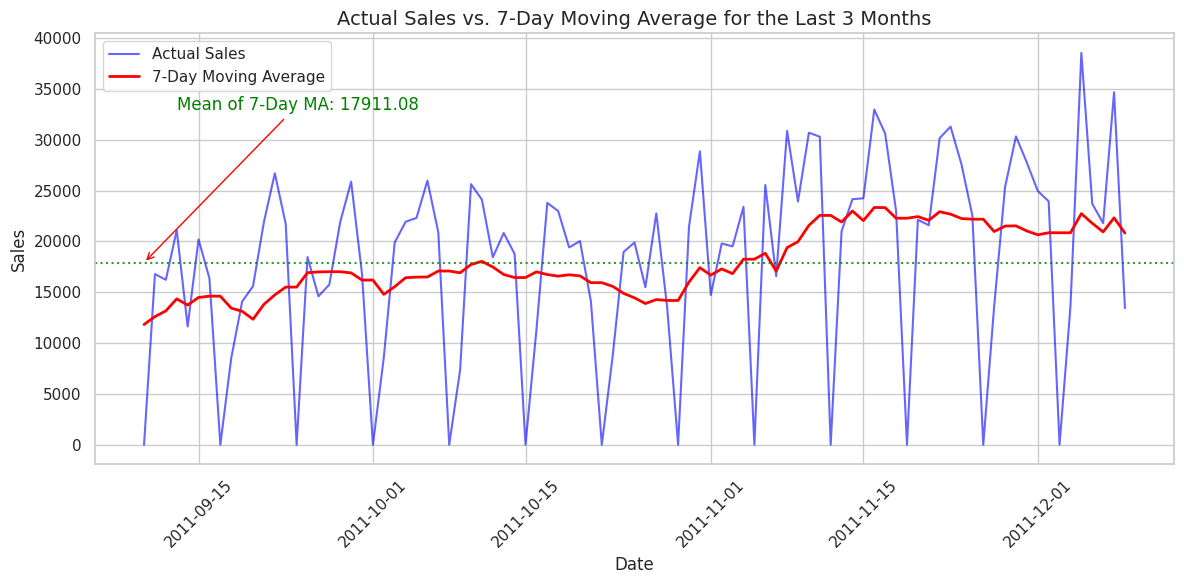

In [ ]:
plt.figure(figsize=(12, 6))

# last_three_months_data = daily_sales.last('3M')
# moving_average_last_3_months = moving_average.last('3M')

# Plot Actual Sales
plt.plot(last_3_months_sales.index, last_3_months_sales, label='Actual Sales', color='blue', alpha=0.6)

# Plot 7-Day Moving Average
plt.plot(last_3_months_sales.index, moving_average.loc[last_3_months_sales.index], label='7-Day Moving Average', color='red', linewidth=2)

# Adding labels and title
plt.title('Actual Sales vs. 7-Day Moving Average for the Last 3 Months', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.xticks(rotation=45)

# Calculate the average of the 7-day moving average (a single scalar value)
moving_average_mean = moving_average.loc[last_3_months_sales.index].mean()
plt.axhline(y=moving_average_mean, color='green', linestyle=':', alpha=0.8 ,label='Mean of 7-Day Moving Average')

# Annotating the mean line
plt.annotate(f'Mean of 7-Day MA: {moving_average_mean:.2f}',
             xy=(last_3_months_sales.index[0], moving_average_mean),
             xytext=(last_3_months_sales.index[3] , moving_average_mean + 15000),
             arrowprops=dict(facecolor='green',edgecolor='red', arrowstyle="->"),
             fontsize=12, color='green')

# Show plot
plt.tight_layout()

plt.savefig('Actual_Sales_vs_7_Day_Moving_last_3_month.png',format="png",dpi=800,bbox_inches='tight')
plt.show()



> Interactive plot



In [ ]:
# Interactive Time Series Plot
fig = px.line(x=last_3_months_sales.index, y=[last_3_months_sales, moving_average.loc[last_3_months_sales.index]],
              title='Interactive Time Series Data',
              line_shape='linear')


fig.update_layout(title_font_size=18)
#change names of labels
fig.update_layout(xaxis_title='Date', yaxis_title='Sales')

#Enable range slider on the x-axis
fig.update_xaxes(rangeslider_visible=True)

#Set line width
fig.update_traces(line=dict(width=3))

#change legends name
fig.update_layout(legend_title_text='Legend')


# Update legend names
fig.data[0].name = 'Actual Sales'
fig.data[1].name = '7-Day Moving Average'

fig.show()

# 🎯 **Task 9 : Summary Dashboard Creation** 📊📺
**Description**: Create a dashboard that summarizes key insights through visualizations.

**Requirments**:

Create a 2x2 subplot with:
  1.   Monthly sales trend
  2.   Top 5 products by revenue
  3.   Customer segment distribution
  4.   Top 5 countries by revenue.




In [ ]:
#color_list = sns.color_palette("viridis", 5)

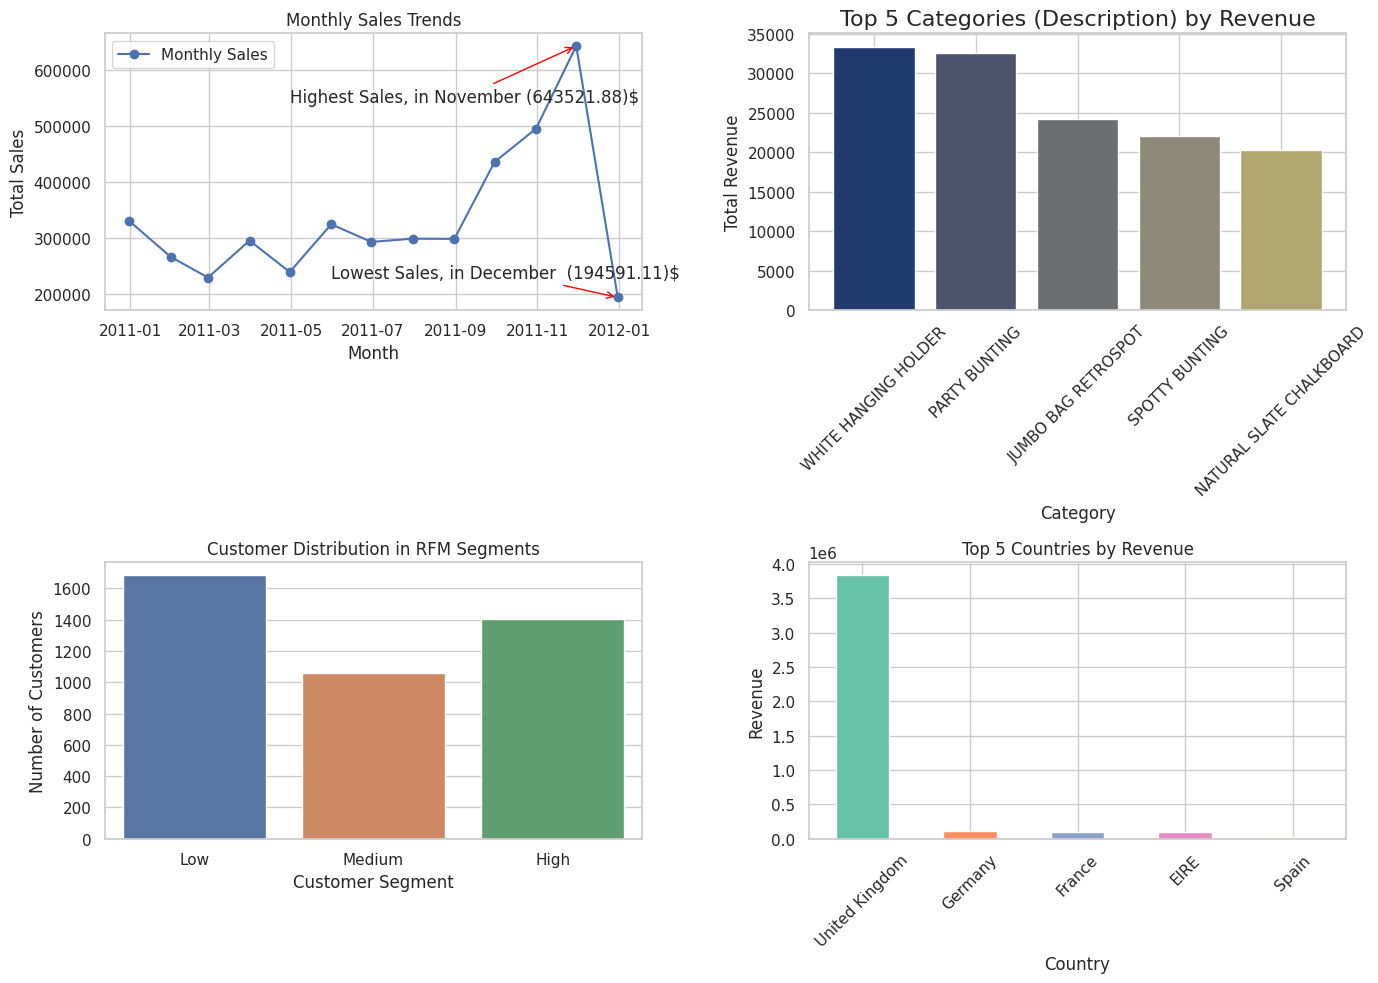

In [ ]:

color_list_1 = sns.color_palette("cividis")
color_list_2 = sns.color_palette("Set2")
# Create the 2x2 grid of plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # 2 rows and 2 columns

#Monthly Sales Trends (Line Plot)
axes[0, 0].plot(monthly_sales.index, monthly_sales.values, marker='o', color='b', linestyle='-', label='Monthly Sales')
axes[0, 0].set_title('Monthly Sales Trends')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Total Sales')
axes[0, 0].grid(True)
axes[0, 0].legend()

# Annotating the highest sales (November)
axes[0, 0].annotate(f'Highest Sales, in November ({monthly_sales.values[11]:.02f})$',
             xy=(monthly_sales.index[11],monthly_sales.values[11]),
            xytext=(monthly_sales.index[4],monthly_sales.values[11]-100000) ,
             arrowprops=dict(facecolor='red',edgecolor='red',arrowstyle='->') )

# Annotating the lowest sales (February)
axes[0, 0].annotate(f'Lowest Sales, in December  ({monthly_sales.values[-1]:.02f})$',
             xy=(monthly_sales.index[-1],monthly_sales.values[-1]),
            xytext=(monthly_sales.index[-8],monthly_sales.values[2]) ,
             arrowprops=dict(facecolor='red',edgecolor='red',arrowstyle='->') )

#Top 5 Categories by Revenue (Bar Plot)
axes[0, 1].bar(top5_categ_Desc['Description'], top5_categ_Desc['TotalRevenue'], color=color_list_1)
axes[0, 1].set_title('Top 5 Categories (Description) by Revenue', fontsize=16)
axes[0, 1].set_xlabel('Category', fontsize=12)
axes[0, 1].set_ylabel('Total Revenue', fontsize=12)
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Customer Distribution in RFM Segments (Count Plot)
sns.countplot(x='Segment', data=RFM_df, hue='Segment', ax=axes[1, 0])
axes[1, 0].set_title('Customer Distribution in RFM Segments')
axes[1, 0].set_xlabel('Customer Segment')
axes[1, 0].set_ylabel('Number of Customers')

# 4. Top 5 Countries by Revenue (Bar Plot)
country_revenue.nlargest(5).plot(kind='bar', ax=axes[1, 1], title='Top 5 Countries by Revenue', color=color_list_2)
axes[1, 1].set_xlabel('Country')
axes[1, 1].set_ylabel('Revenue')
axes[1, 1].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()


plt.savefig('Summary_Dashboard.png',format="png",dpi=800,bbox_inches='tight')
# Show the combined plot
plt.show()


# 🎯 **Task 10 : Optimize Data Processing** ⚡💻
**Description**: Optimize a computationally intensive task using vectorized operations.

**Requirments**:
-  Implement a task using loops.
-  Implement the same task using vectorized operations.
-  Compare and report performance differences.




In [ ]:
import time
# Vectorized Approach (Optimized)
start_time_vectorized = time.time()
Total_p = data['Quantity'] * data['UnitPrice']
end_time_vectorized = time.time()
vectorized_duration = end_time_vectorized - start_time_vectorized


# Loop-Based Approach
start_time_loop = time.time()
total_revenue_loop = []
for index, row in data.iterrows():
  revenue = row['Quantity'] * row['UnitPrice']
  total_revenue_loop.append(revenue)
end_time_loop = time.time()
loop_duration = end_time_loop - start_time_loop

#Performance Comparison
print(f"Vectorized approach time: {vectorized_duration:.4f} seconds")
print(f"Loop-based approach time: {loop_duration:.4f} seconds")

# Compare the performance
if vectorized_duration < loop_duration:
    print("Vectorized approach is faster.")
else:
    print("Loop-based approach is faster.")


Vectorized approach time: 0.0023 seconds
Loop-based approach time: 25.4492 seconds
Vectorized approach is faster.


In [ ]:
results_df = pd.DataFrame({
    'Approach': ['Loop-based', 'Vectorized'],
    'Duration (seconds)': [loop_duration, vectorized_duration]
})

display(results_df)

Approach  Duration (seconds)
0  Loop-based           25.449229
1  Vectorized            0.002347

# 🎯 **Task 11 : Report Generation** 📜📋
**Description**: Generate a summary report with key insights and recommendations.

**Requirments**:
-  Summarize overall revenue, top-selling products, best customer segments, and countries.
-  Provide insights from time series analysis and recommendations.




Save the Filtered Data

In [ ]:
# Save the data after filteration
data.to_csv('filtered_data.csv', index=False)